# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [161]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [162]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [163]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

In [164]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

In [165]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [166]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [167]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [168]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**

In [169]:
# Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas:
dataset = pd.concat([data_2019, data_2018, data_2017])

# Nos quedamos solamente con la estación Illia y la forma de pago Efectivo:
mask = np.logical_and(dataset.estacion =='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

# Quitamos las columnas que no vamos a utilizar:
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
80   2019-01-01         2  Martes     Centro       Liviano             537
86   2019-01-01         2  Martes     Centro        Pesado               1
88   2019-01-01         2  Martes  Provincia       Liviano             443
94   2019-01-01         2  Martes  Provincia        Pesado               1
149  2019-01-01         3  Martes     Centro       Liviano             769

In [170]:
# Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora:
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

# Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2:
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [171]:
# Corregimos el nombre de fecha2 a fecha:

dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [172]:
# Reordenamos el dataset por fecha:

dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
1       Domingo  Provincia       Liviano               9 2017-01-01 00:00:00
2       Domingo  Provincia       Liviano             644 2017-01-01 00:00:00
3       Domingo  Provincia        Pesado               6 2017-01-01 00:00:00
4       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
...         ...        ...           ...             ...                 ...
238864   Martes  Provincia       Liviano             556 2019-12-31 22:00:00
238865   Martes  Provincia        Pesado               1 2019-12-31 22:00:00
238866   Martes     Centro       Liviano             580 2019-12-31 22:00:00
238867   Martes     Centro       Liviano             214 2019-12-31 23:00:00
238868   Martes  Provincia       Liviano             190 2019-12-31 23:00:00

[238869 rows x 5 columns]

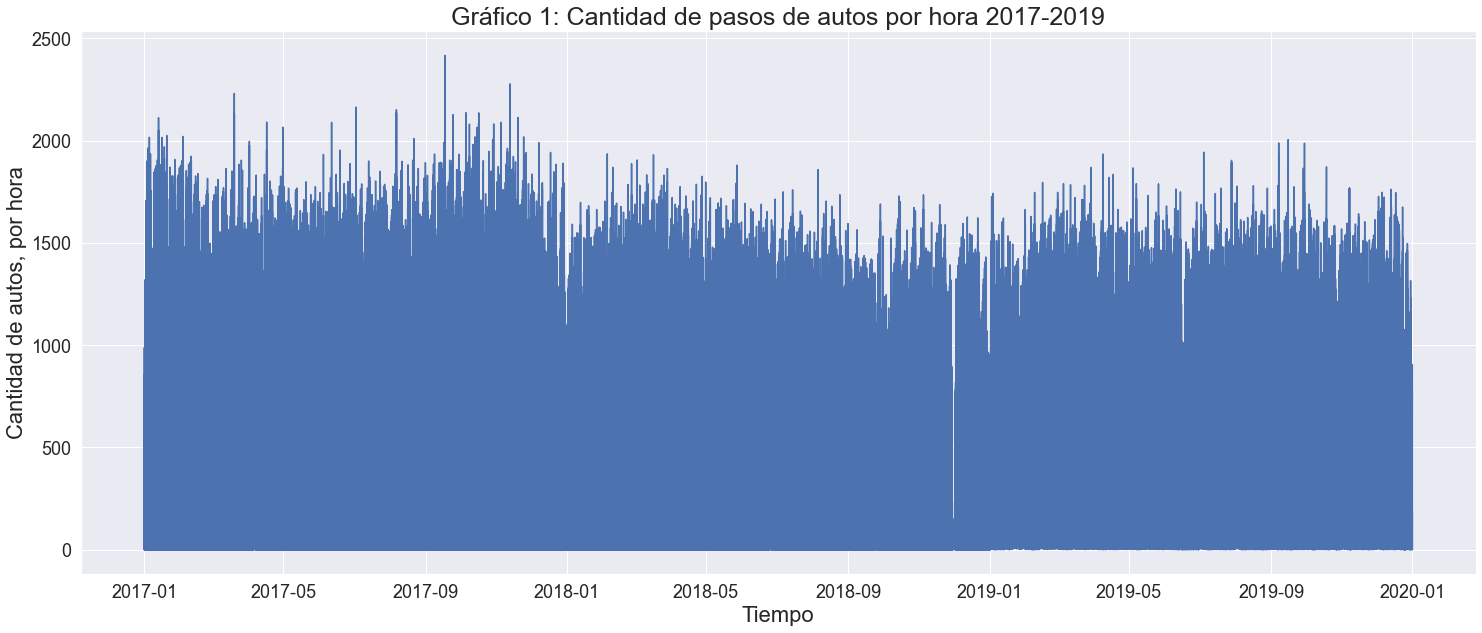

In [173]:
# Graficamos nuestros datos, tal como están:

sns.set(rc = {'figure.figsize':(25,10)})
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Tiempo', fontsize = 22)
plt.ylabel('Cantidad de autos, por hora', fontsize = 22)
plt.title("Gráfico 1: Cantidad de pasos de autos por hora 2017-2019", fontsize = 25)
plt.show()

In [174]:
dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos      fecha
0  Domingo  Provincia        Pesado               1 2017-01-01
1  Domingo  Provincia       Liviano               9 2017-01-01
2  Domingo  Provincia       Liviano             644 2017-01-01
3  Domingo  Provincia        Pesado               6 2017-01-01
4  Domingo  Provincia        Pesado               1 2017-01-01

In [175]:
# Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable:

diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486

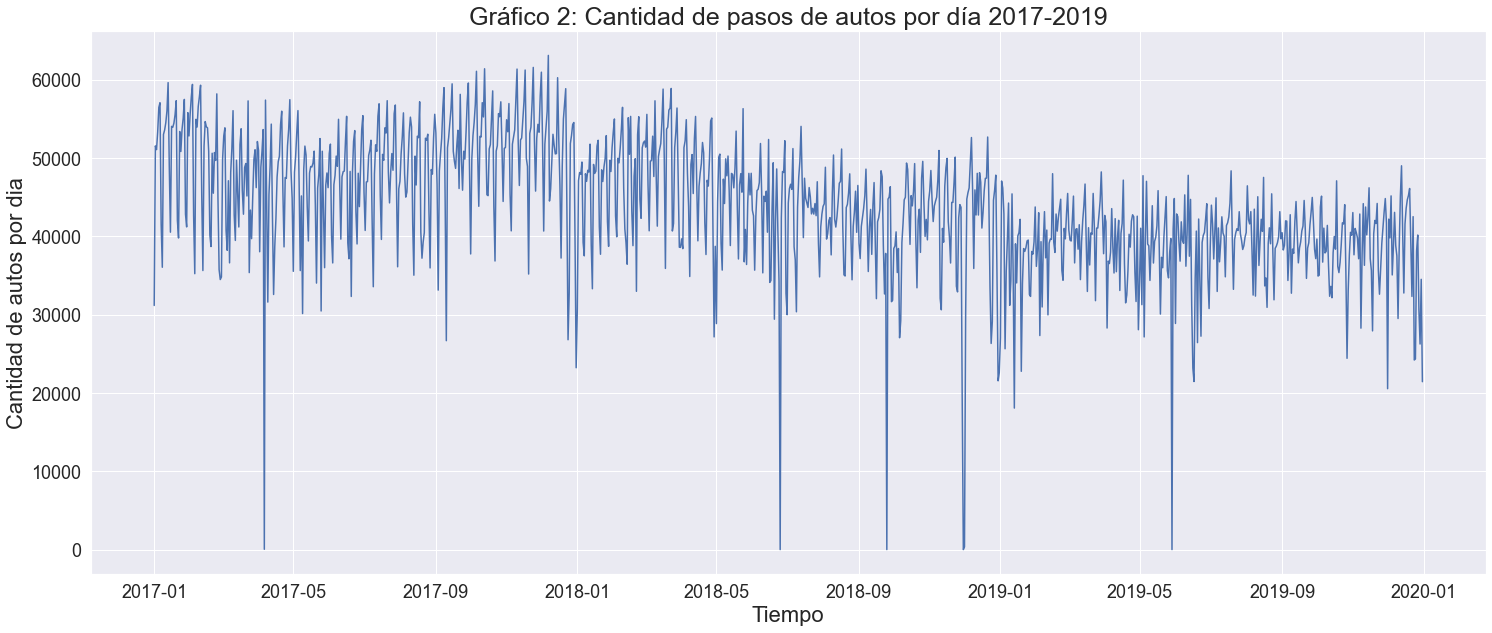

In [176]:
sns.set(rc = {'figure.figsize':(25,10)})
plt.plot(diario.index, diario.cantidad_pasos)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Tiempo', fontsize = 22)
plt.ylabel('Cantidad de autos por dia', fontsize = 22)
plt.title("Gráfico 2: Cantidad de pasos de autos por día 2017-2019", fontsize = 25)
plt.show()

In [177]:
diario.head()

cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486

In [178]:
diario.columns

Index(['cantidad_pasos'], dtype='object')

#### Análisis exploratorio y preprocesamiento de los datos

In [179]:
# Generamos un nuevo Data Set para poder hacer la diferenciación de datos (fechas) y los gráficos de Groupby, ya que si no la
# fecha será el índice y no podremos hacerlo. Necesitamos que esta sea una columna.

In [180]:
diario_1 = diario.copy()
diario_1.reset_index(inplace = True)
diario_1.columns

Index(['fecha', 'cantidad_pasos'], dtype='object')

In [181]:
diario_1['resampleo_check'] = diario_1.fecha.diff()
diario_1.resampleo_check.value_counts()

1 days    1094
Name: resampleo_check, dtype: int64

In [182]:
diario_1.head()

fecha  cantidad_pasos resampleo_check
0 2017-01-01           31183             NaT
1 2017-01-02           51568          1 days
2 2017-01-03           51093          1 days
3 2017-01-04           53332          1 days
4 2017-01-05           56486          1 days

In [183]:
trafico_dias = diario_1.groupby(diario_1.fecha.dt.day_name()).sum().sort_values('cantidad_pasos', ascending = True)
trafico_dias

cantidad_pasos
fecha                    
Sunday            5791961
Saturday          6441715
Monday            6691387
Tuesday           6865551
Wednesday         7125526
Thursday          7302169
Friday            7647272

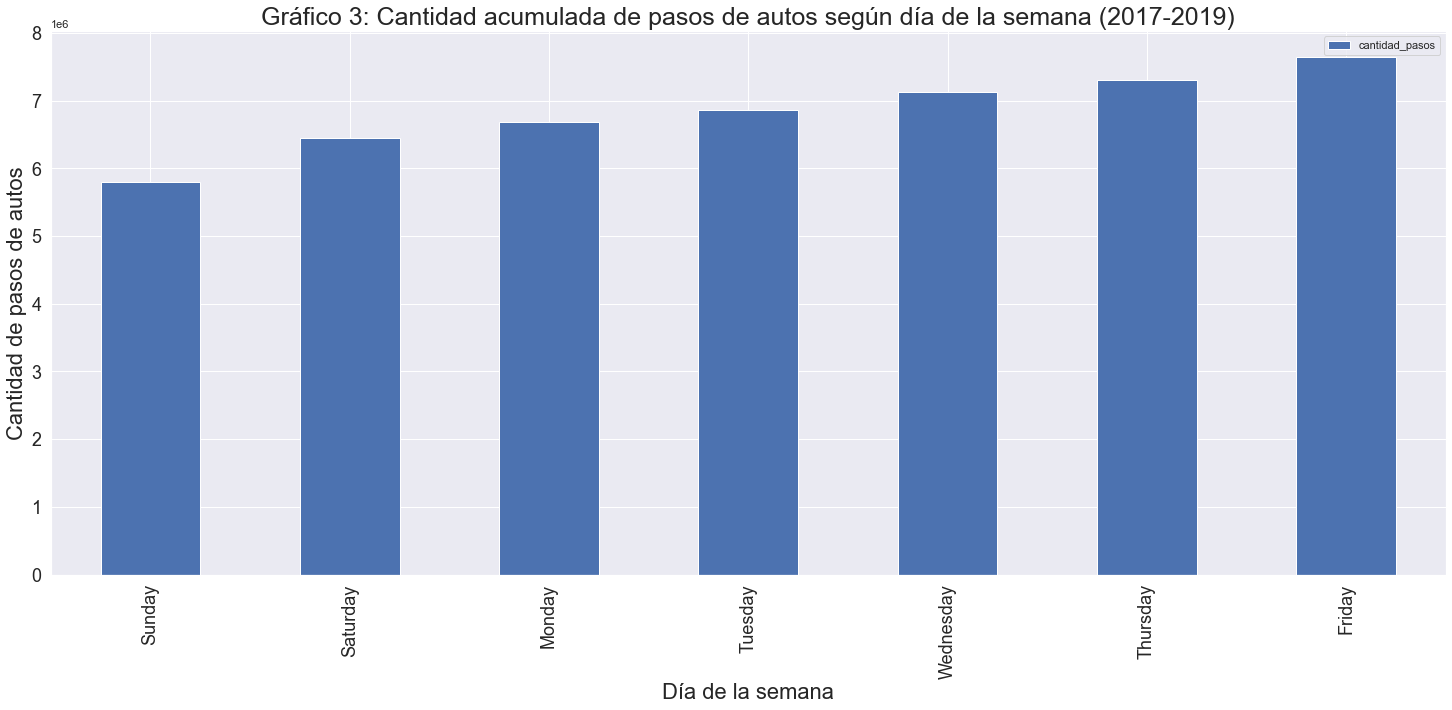

In [184]:
sns.set(rc = {'figure.figsize':(25, 10)})
trafico_dias.plot.bar()
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Día de la semana', fontsize = 22)
plt.ylabel('Cantidad de pasos de autos', fontsize = 22)
plt.title("Gráfico 3: Cantidad acumulada de pasos de autos según día de la semana (2017-2019)", fontsize = 25)
plt.show()

In [185]:
# Los días de mayor tráfico son los Viernes. En cambio, los días con menos autos pasando por los peajes son los Domingos.

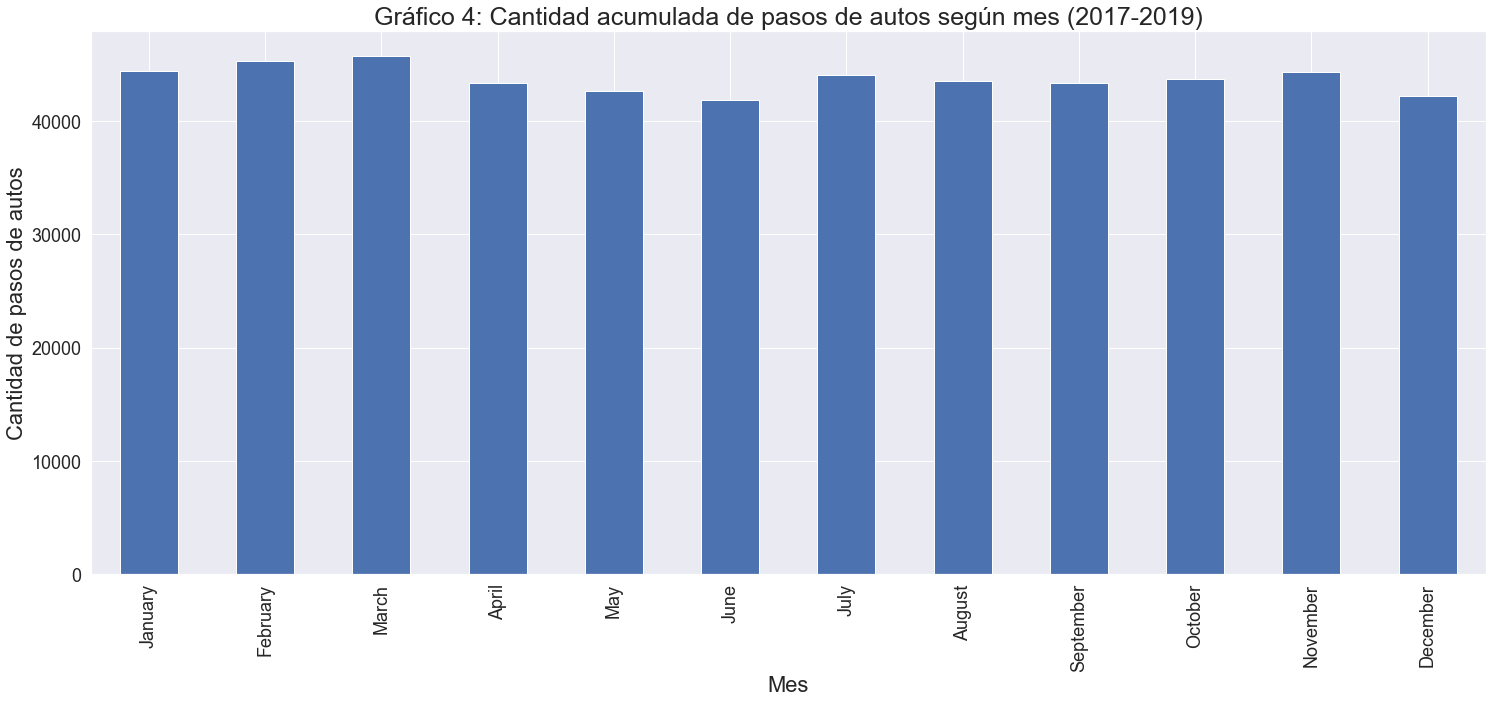

In [186]:
sns.set(rc = {'figure.figsize':(25, 10)})
diario_1.groupby(diario_1.fecha.dt.month_name(), sort = False)['cantidad_pasos'].mean().plot.bar()
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Mes', fontsize = 22)
plt.ylabel('Cantidad de pasos de autos', fontsize = 22)
plt.title("Gráfico 4: Cantidad acumulada de pasos de autos según mes (2017-2019)", fontsize = 25)
plt.show()

In [187]:
# Si bien el tráfico es bastante similar a lo largo del año, puede decirse que los meses con mayor cantidad de pasos por el
# peaje son Marzo y Febrero. En cambio, aquellos con menor cantidad son Junio y Diciembre.

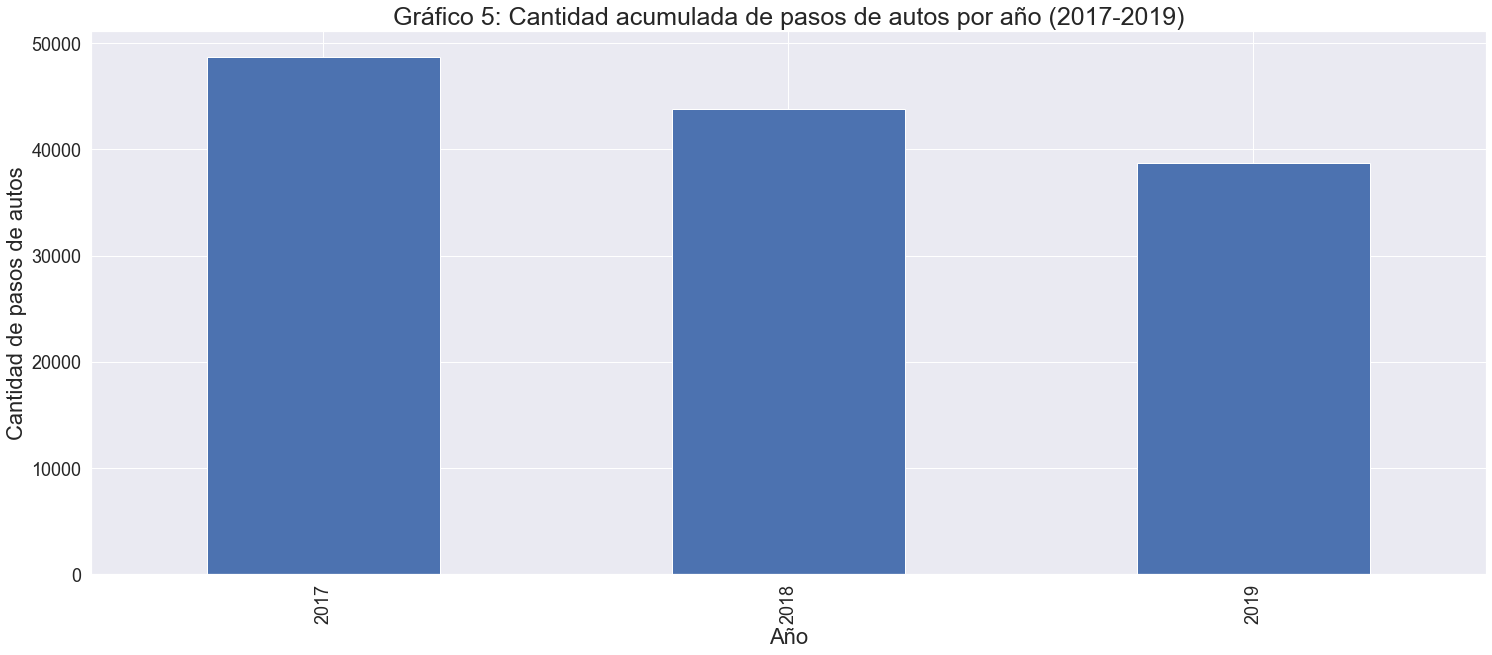

In [188]:
sns.set(rc = {'figure.figsize':(25, 10)})
diario_1.groupby(diario_1.fecha.dt.year)['cantidad_pasos'].mean().plot.bar()
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Año', fontsize = 22)
plt.ylabel('Cantidad de pasos de autos', fontsize = 22)
plt.title("Gráfico 5: Cantidad acumulada de pasos de autos por año (2017-2019)", fontsize = 25)
plt.show()

In [189]:
# Con el correr de los años, si bien podemos suponer que el tráfico se incrementó, la cantidad de personas pasando por el peaje
# y pagando en efectivo disminuyó notablemente. Esto podría deberse a la migración a otras formas de pago (Telepase, por ejemplo).

##### Outliers y distribución de los datos

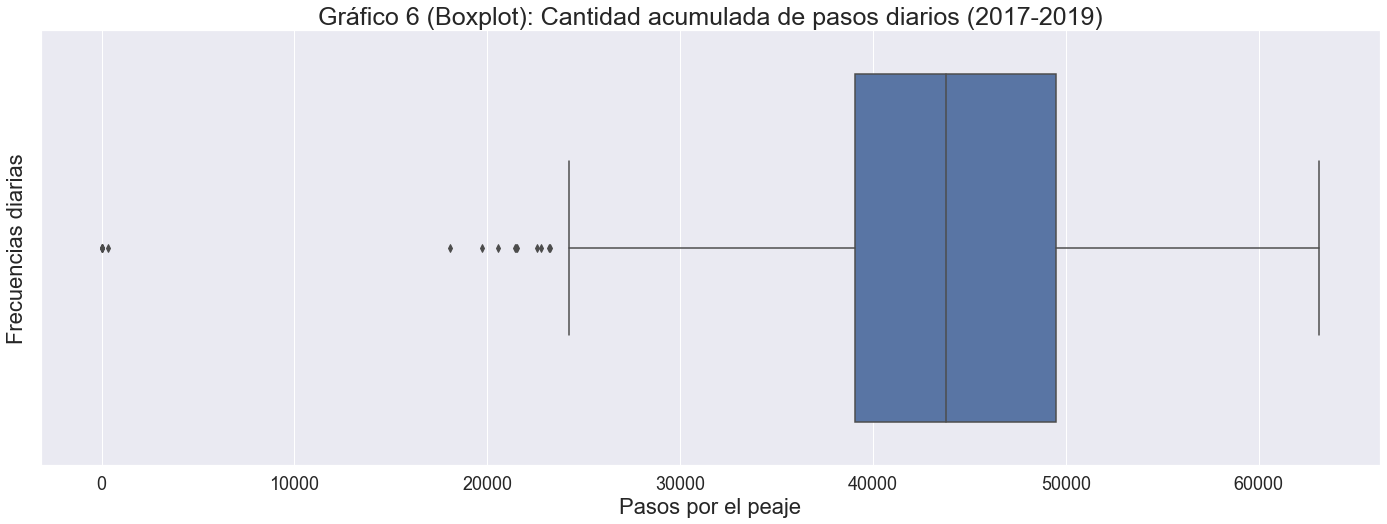

In [190]:
plt.figure(figsize = (24,8))
sns.boxplot(x = 'cantidad_pasos', data = diario)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Gráfico 6 (Boxplot): Cantidad acumulada de pasos diarios (2017-2019)', fontsize = 25);
plt.xlabel('Pasos por el peaje', fontsize = 22);
plt.ylabel('Frecuencias diarias', fontsize = 22);

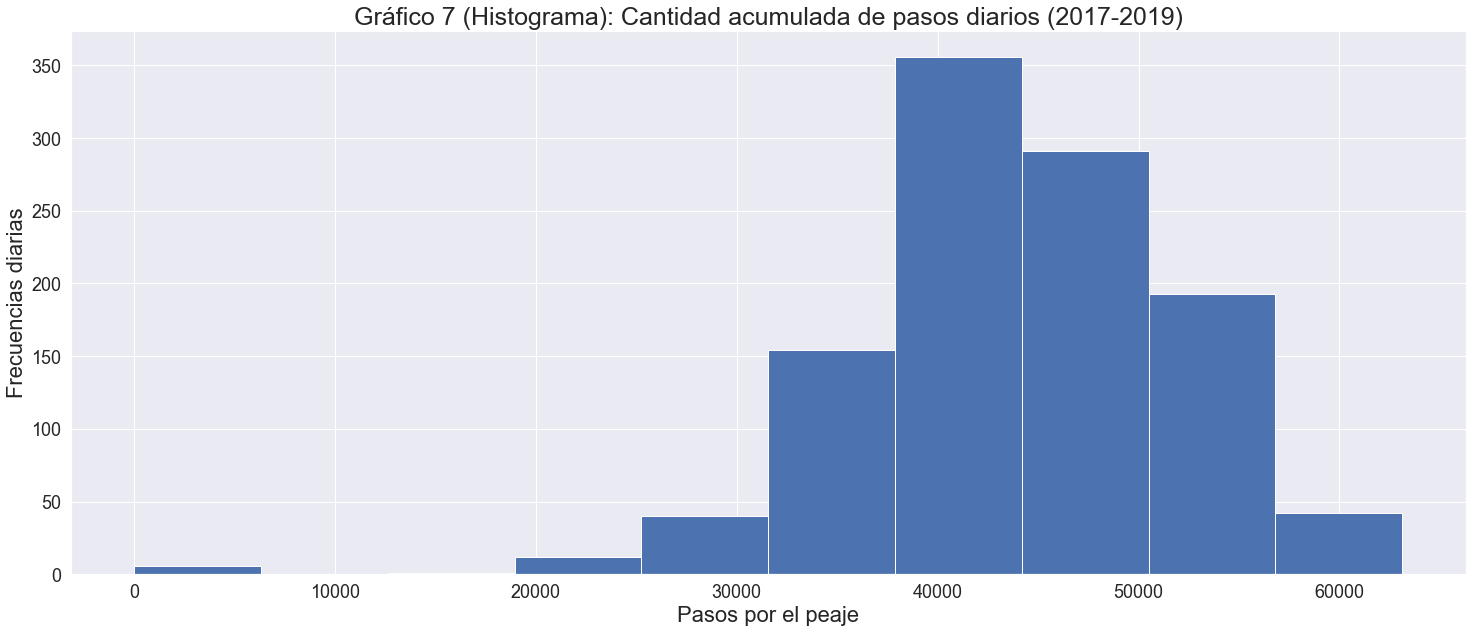

In [191]:
plt.hist(diario.cantidad_pasos)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Gráfico 7 (Histograma): Cantidad acumulada de pasos diarios (2017-2019)', fontsize = 25);
plt.xlabel('Pasos por el peaje', fontsize = 22);
plt.ylabel('Frecuencias diarias', fontsize = 22);

In [192]:
# Como puede apreciarse, la distribución de los datos es relativamente simétrica y normal y existen valores atípicos, sobre
# todo con cantidad de pasos muy bajos por los peajes.

##### Filtrado de valores atípicos

In [193]:
# Al ser la distribución de la cantidad de pasos normal o gaussiana, existe la posibilidad de utilizar la regla de las tres
# sigmas para filtrar outliers. Primero se generarán nulos en reemplazo des estos datos y luego se utilizará interpolate para
# llenar los mismos.

In [194]:
media_cantidad_pasos = np.mean(diario.cantidad_pasos)
std_cantidad_pasos = np.std(diario.cantidad_pasos)
minimo_cantidad_pasos = media_cantidad_pasos - 3*std_cantidad_pasos
maximo_cantidad_pasos = media_cantidad_pasos + 3*std_cantidad_pasos
print("Cantidad de Pasos Diarios")
print("Media:", media_cantidad_pasos)
print("Desvío Estándar:", std_cantidad_pasos)
print("Cantidad de Pasos MÍNIMA:", minimo_cantidad_pasos)
print("Cantidad de Pasos MÁXIMA:", maximo_cantidad_pasos)

Cantidad de Pasos Diarios
Media: 43712.859360730596
Desvío Estándar: 8188.995096625065
Cantidad de Pasos MÍNIMA: 19145.8740708554
Cantidad de Pasos MÁXIMA: 68279.8446506058


In [195]:
diario.cantidad_pasos[diario.cantidad_pasos > maximo_cantidad_pasos] = np.nan
diario.cantidad_pasos[diario.cantidad_pasos < minimo_cantidad_pasos] = np.nan

In [196]:
diario.isna().sum()

cantidad_pasos    7
dtype: int64

In [197]:
diario = diario.interpolate()
diario.isna().sum()

cantidad_pasos    0
dtype: int64

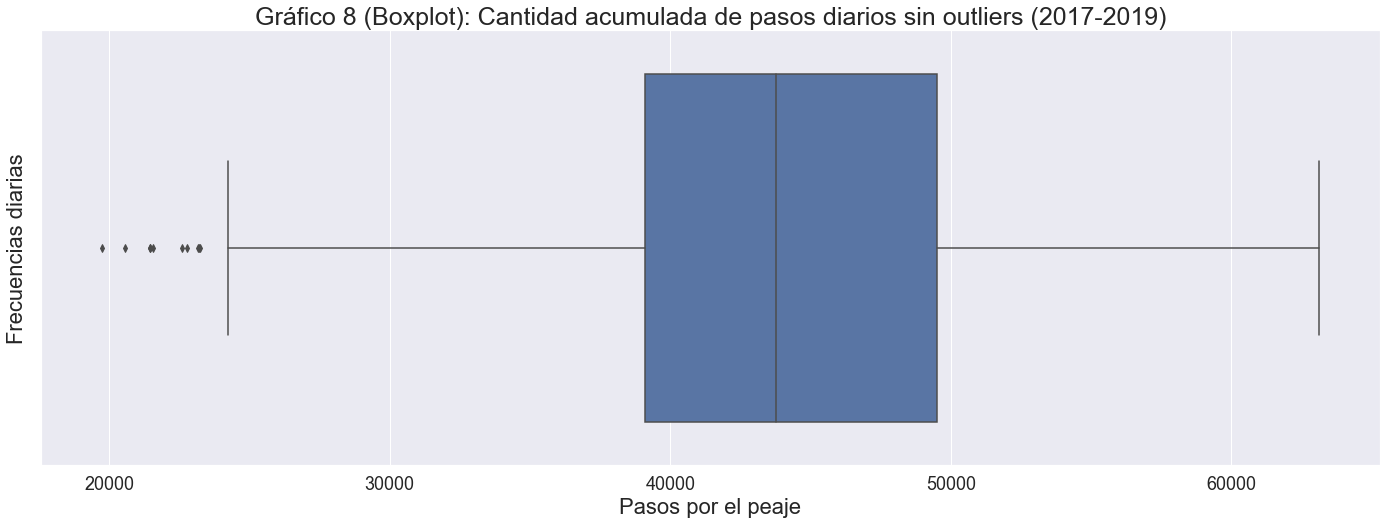

In [198]:
plt.figure(figsize = (24,8))
sns.boxplot(x = 'cantidad_pasos', data = diario)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Gráfico 8 (Boxplot): Cantidad acumulada de pasos diarios sin outliers (2017-2019)', fontsize = 25);
plt.xlabel('Pasos por el peaje', fontsize = 22);
plt.ylabel('Frecuencias diarias', fontsize = 22);

##### Componentes estacionales y tendencia de la serie

###### Gráfico 9: Descomposición de la Serie de Tiempo

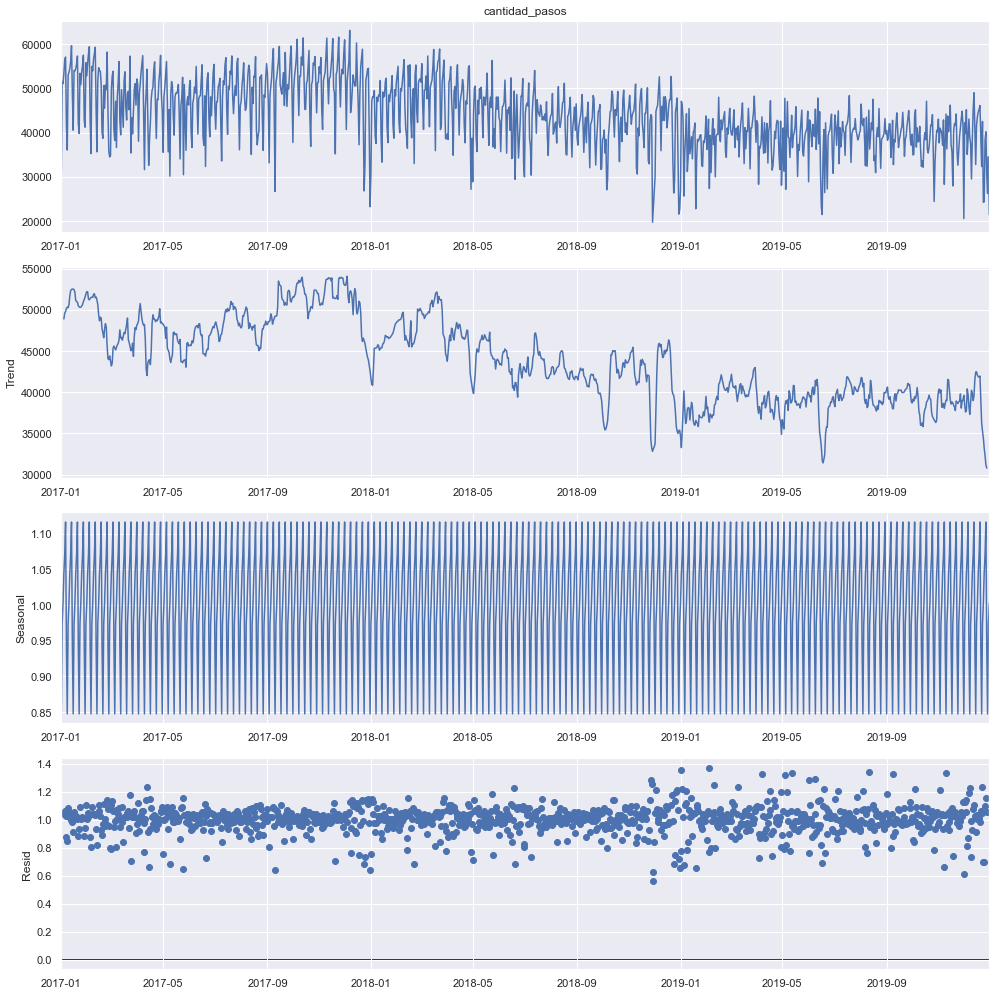

In [199]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib

result = seasonal_decompose(diario.cantidad_pasos, model = 'multiplicative')

matplotlib.rcParams['figure.figsize'] = [14, 14]
result.plot()
plt.show()

In [200]:
# Como se puede apreciar, la tendencia (Trend) de la serie de tiempo es decreciente (debido a la migración a formas de pago
# digitales). Asimismo, se puede ver que existen ciclos semanales constantes ya que la descomposición en lo que respecta este
# punto (Seasonal) muestra líneas con poco espacio de diferencia y con constancia. Por último, a simple vista podría inferirse que
# los residuos (Resid) son azarosos y por ruido blanco, ya que casi todos los puntos están a una misma altura, distribuidos de
# modo bastante uniforme. No obstante ello, para considerarse que los residuos son completamente azarosos, la media debería ser
# 0, lo cual no parece cumplirse. Es posible que esto se deba a que la serie no sea estacionaria y tenga una tendencia declinante
# considerable.

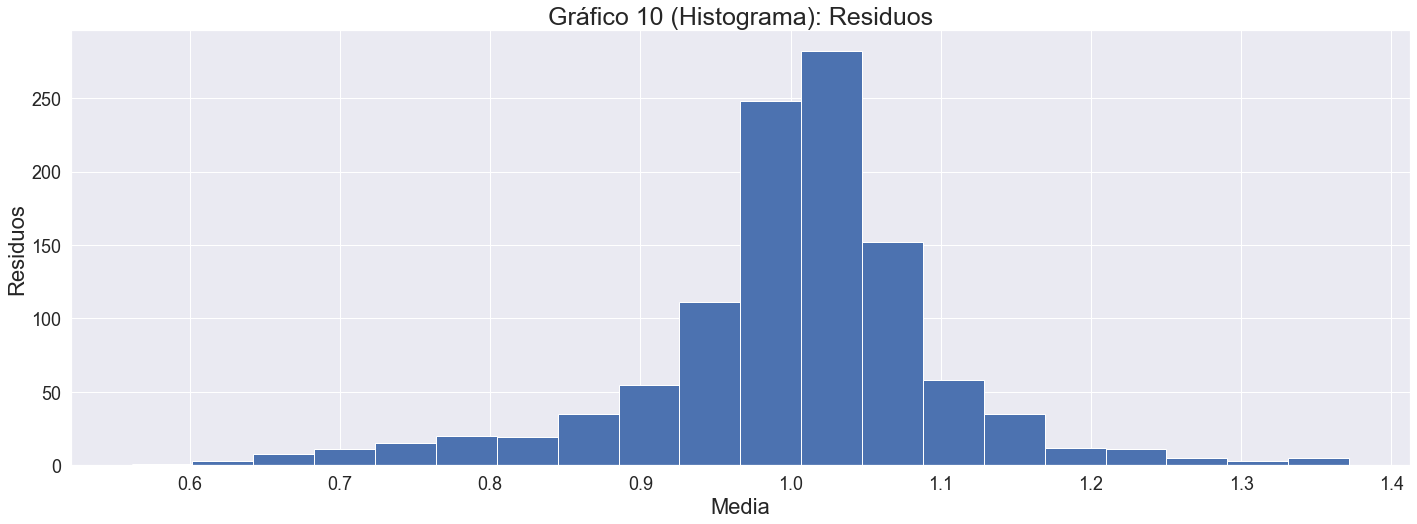

In [201]:
plt.figure(figsize = (24,8))
plt.hist(result.resid, bins = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Gráfico 10 (Histograma): Residuos', fontsize = 25);
plt.xlabel('Media', fontsize = 22);
plt.ylabel('Residuos', fontsize = 22);
plt.show()

In [202]:
# Como puede apreciarse, el histograma es bastante simétrico, de modo que podríamos deducir que los residuos de la serie con
# la que se está trabajando son mayormente consecuencia de ruido blanco.

##### Tendencia Lineal (Regresión Lineal)

In [203]:
diario['fecha_numeros'] = diario.index.map(datetime.datetime.toordinal)
diario.head()

cantidad_pasos  fecha_numeros
fecha                                    
2017-01-01         31183.0         736330
2017-01-02         51568.0         736331
2017-01-03         51093.0         736332
2017-01-04         53332.0         736333
2017-01-05         56486.0         736334

In [204]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(diario.fecha_numeros.values.reshape(-1, 1), diario.cantidad_pasos)

LinearRegression()

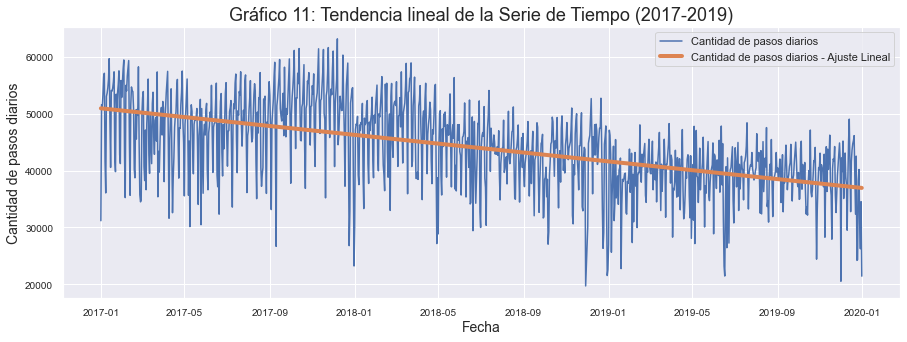

In [205]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad de pasos diarios')
plt.plot(diario.index, reg.predict(diario.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Cantidad de pasos diarios - Ajuste Lineal')
# plt.xlim(datetime.date(1985,1,1), datetime.date(2018,1,1))
# plt.ylim([0,30])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Gráfico 11: Tendencia lineal de la Serie de Tiempo (2017-2019)', fontsize = 18);
plt.xlabel('Fecha', fontsize = 14);
plt.ylabel('Cantidad de pasos diarios', fontsize = 14);
plt.legend()
plt.show()

In [206]:
# La tendencia lineal es negativa debido a la migración a otras formas de pago (Telepeaje, medios de pago digitales, etc).

##### Autocorrelaciones

In [207]:
from statsmodels.tsa.stattools import acf

nlags = 50
autocorr = acf(diario.cantidad_pasos, nlags = nlags)

C:\Users\User\miniconda3\envs\datascience\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


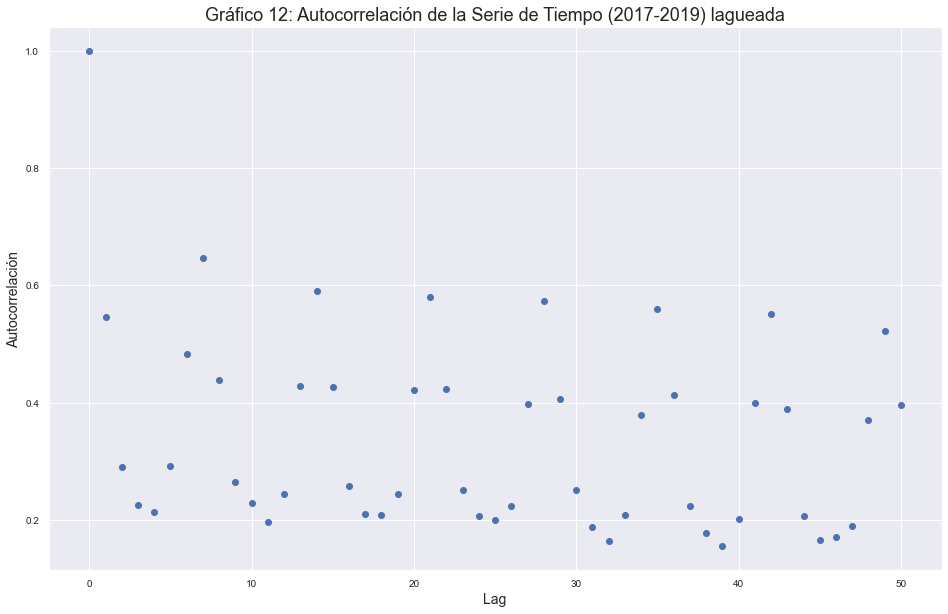

In [208]:
plt.figure(figsize = (16, 10))
plt.scatter(np.arange(nlags + 1), autocorr)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Gráfico 12: Autocorrelación de la Serie de Tiempo (2017-2019) lagueada', fontsize = 18);
plt.xlabel('Lag', fontsize = 14);
plt.ylabel('Autocorrelación', fontsize = 14);
plt.show()

In [209]:
# Puede contemplarse que el primer valor de autocorrelación (lag 0) da 1 porque se está evaluando la serie contra ella misma.
# Respecto del resto de los puntos, puede observarse una constancia en la autocorrelación de la serie. La misma pareciera mostrar
# patrones comunes en los mismos días de cada semana.

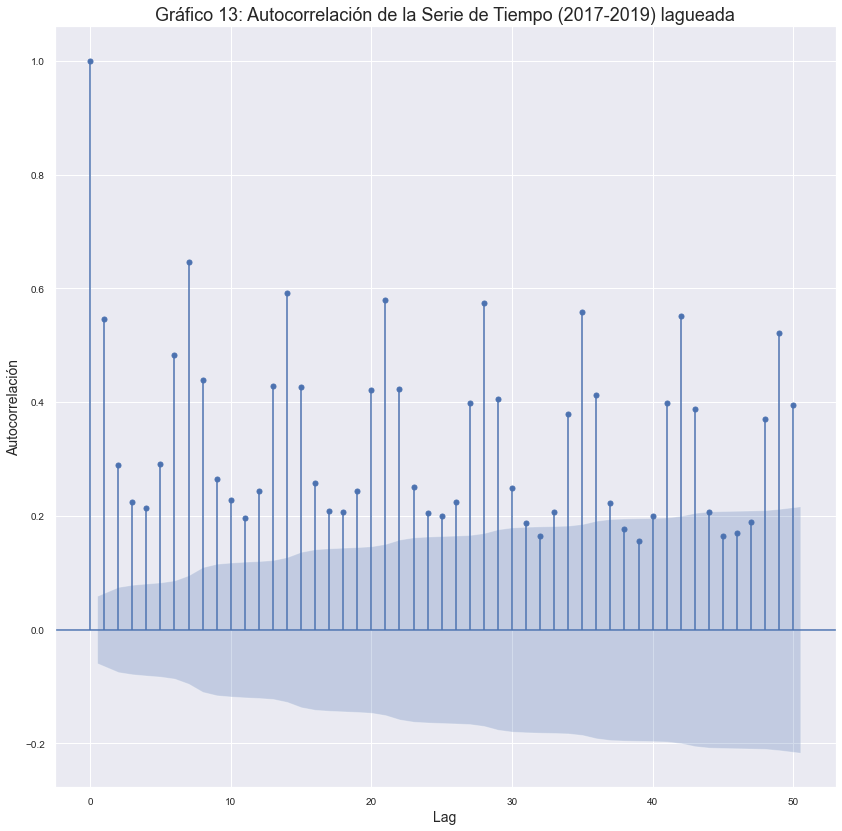

In [210]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diario.cantidad_pasos, lags = 50)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Gráfico 13: Autocorrelación de la Serie de Tiempo (2017-2019) lagueada', fontsize = 18);
plt.xlabel('Lag', fontsize = 14);
plt.ylabel('Autocorrelación', fontsize = 14);
plt.show()

In [211]:
# Como puede verse en el gráfico precedente, existen muchos valores de autocorrelación significativos (por fuera del intervalo
# de confianza), lo que quiere decir que la serie no sería, en principio, estacionaria. Asimismo, parece confirmarse la existencia
# de un ciclo semanal autocorrelacionado.

##### Transformación One Step Prediction

In [212]:
senial = diario.cantidad_pasos
senial.head()

fecha
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
Freq: D, Name: cantidad_pasos, dtype: float64

In [213]:
# Se define la cantidad de datos (días) con los que se predecirá:

look_back = 60

In [214]:
# Se genera la tabla VACÍA con la que se entrenará el modelo:

N = senial.shape[0]
X = np.zeros((N - look_back - 1, look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1034, 60) (1034,)


In [215]:
# Se llena la tabla con los datos de las observaciones:

for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [216]:
# Se define que se entrenará al modelo en base a datos de dos años del dataset y se lo evaluará con el año restante:

N_train = 2 * 365 - look_back
N_test = 1 * 365
N_total = N_train + N_test

length_total = N_train + N_test + look_back
                                            
X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train : N_train + N_test,:]
y_test = y[N_train : N_train + N_test]
print(X_test.shape, y_test.shape)

(670, 60) (670,)
(364, 60) (364,)


#### Predicción a Futuro

##### Modelo Benchmark: predicción en base al valor de la fecha anterior

In [217]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [218]:
y_train_pred_benchmark = y[0 : N_train - 1]

MSE_benchmark_train = mean_squared_error(y_train[1 : N_train], y_train_pred_benchmark)
R2_benchmark_train = r2_score(y_train[1 : N_train], y_train_pred_benchmark)

print('Error (RMSE) en Train:', np.sqrt(MSE_benchmark_train))
print('Error (R2 Score) en Train:', R2_benchmark_train)

Error (RMSE) en Train: 7326.04847167063
Error (R2 Score) en Train: -0.04008050294828114


In [219]:
y_test_pred_benchmark = y[-1 + N_train : N_train - 1 + N_test - 1]

MSE_benchmark_test = mean_squared_error(y_test, y_test_pred_benchmark)
R2_benchmark_test = r2_score(y_test, y_test_pred_benchmark)

print('Error (RMSE) en Test:', np.sqrt(MSE_benchmark_test))
print('Error (R2 Score) en Test:', R2_benchmark_test)

Error (RMSE) en Test: 6481.942281052039
Error (R2 Score) en Test: -0.7145953813125714


In [220]:
# Como puede observarse, el "modelo" pareciera ser bastante errático, tanto en Train como en Test.

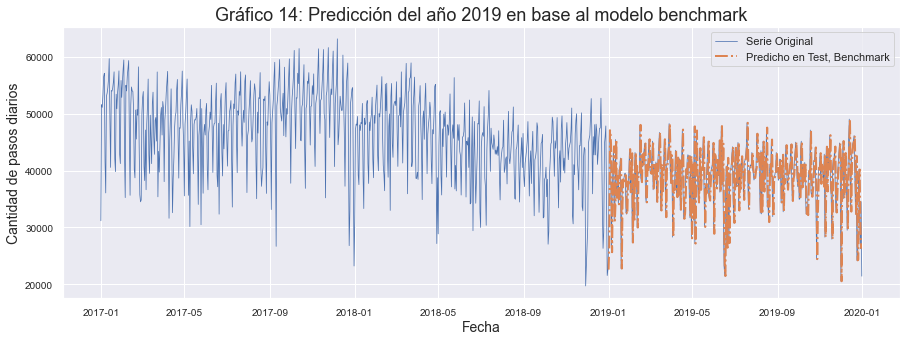

In [221]:
plt.figure(figsize = (15,5))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[N_train + look_back: length_total - 1], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Gráfico 14: Predicción del año 2019 en base al modelo benchmark', fontsize = 18);
plt.xlabel('Fecha', fontsize = 14);
plt.ylabel('Cantidad de pasos diarios', fontsize = 14);
plt.legend()
plt.show()

In [222]:
# No obstante el gran error que tiene este "modelo" para predecir, parece tener bastante capacidad para adaptarse a la tendencia
# de los datos; por lo tanto, los valores predichos están bastante cercanos a los verdaderos.

##### Modelo Avanzado de Predicción: RandomForestRegressor

In [223]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 42, n_jobs = 4).fit(X_train, y_train)

In [224]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

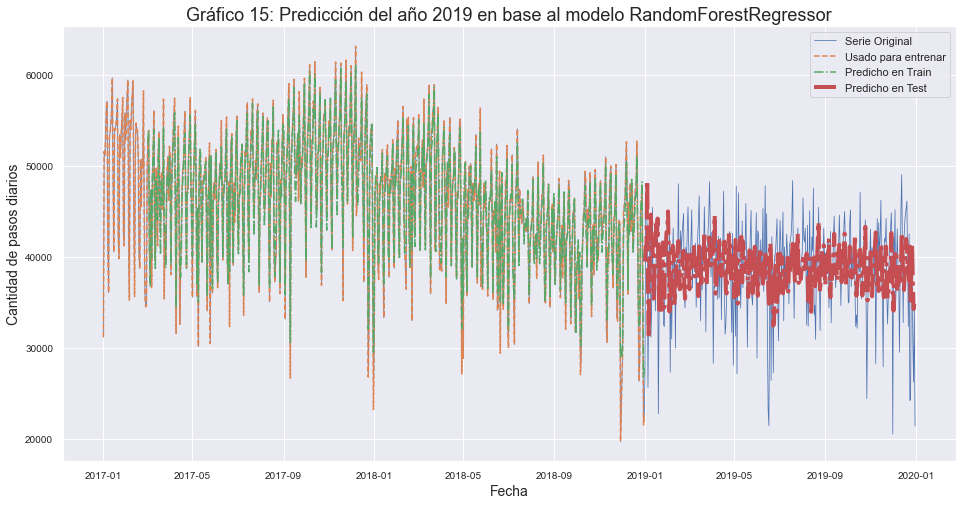

In [225]:
plt.figure(figsize = (16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back : look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train + look_back : length_total - 1], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Gráfico 15: Predicción del año 2019 en base al modelo RandomForestRegressor', fontsize = 18);
plt.xlabel('Fecha', fontsize = 14);
plt.ylabel('Cantidad de pasos diarios', fontsize = 14);
plt.show()

##### Información que utiliza el modelo para predecir

No handles with labels found to put in legend.


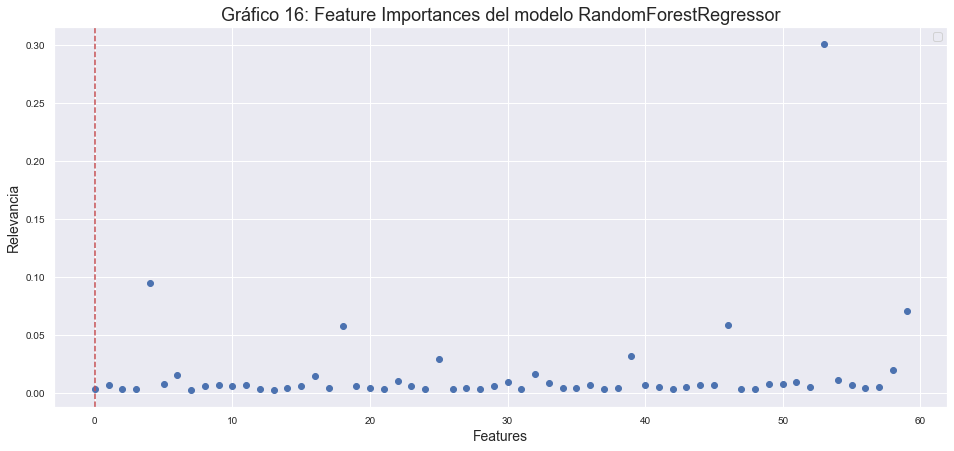

In [226]:
plt.figure(figsize = (16,7))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_)
for x in np.arange(1) * 365:
    plt.axvline(x, linestyle ='--', color= 'r')

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Gráfico 16: Feature Importances del modelo RandomForestRegressor', fontsize = 18);
plt.xlabel('Features', fontsize = 14);
plt.ylabel('Relevancia', fontsize = 14);
plt.legend()
plt.show()

In [227]:
# Como puede apreciarse en el gráfico precedente, el modelo utiliza principalmente las features (fechas diarias) más cercanas a
# la predicción para establecer la cantidad de pasos o tráfico que habrá en el futuro. Asimismo, como se dijo anteriormente,
# existen ciclos anteriores que se repiten y que el modelo utiliza para realizar predicciones. En este caso puede observase que
# la importancia de los features se incrementa considerablemente cada 7 días, lo que sería coincidente con un ciclo semanal que
# se repite.

In [228]:
# Se genera una función para evaluar regresiones:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def evaluar_regresion(model, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### CALCULAMOS EL ERROR
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f'R2 en Train: {r2_train}')
    print(f'R2 en Test: {r2_test}')
    
    ### GRAFICAMOS LOS RESULTADOS
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'Train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'Test')
    plt.title('Gráfico: Densidad de Errores', fontsize = 11, loc = 'center', wrap = True);
    plt.xlabel('Errores', fontsize = 9)
    plt.ylabel('Densidad', fontsize = 9)
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s = 2)
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
   
    ax.plot(lims, lims, 'k-', alpha = 0.75, zorder = 0)
    plt.title('Gráfico: Val. Reales vs Val. Predichos (Test)', fontsize = 11, loc = 'center', wrap = True)
    plt.xlabel('y (Test)', fontsize = 9)
    plt.ylabel('y_pred (Test)', fontsize = 9)

    plt.tight_layout()
    plt.show()

Raíz del error cuadrático medio en Train: 1801.9050630672496
Raíz del error cuadrático medio en Test: 4941.120811209586
R2 en Train: 0.9370657921616256
R2 en Test: 0.0036721373486104936


C:\Users\User\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


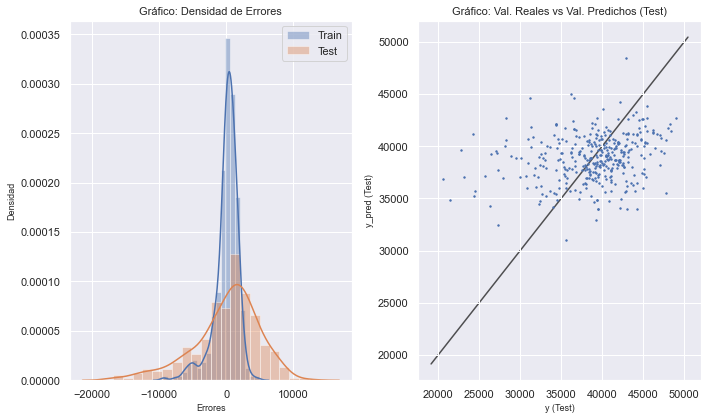

In [229]:
evaluar_regresion(rf, X_train, X_test, y_train, y_test)

In [230]:
# El modelo pareciera ser bastante preciso en Train pero muy incapaz para predecir en Test. Esto podría deberse a la tendencia
# decreciente de la serie (lo que disminuiría la capacidad predictora del modelo) y al algoritmo utilizado (RandomForestRegressor),
# el cual suele tener una tendecia hacia el sobreajuste.

# El histograma de los errores es relativamente simétrico, aproximadamente gaussiano, pero no parecido para ambos conjuntos, ya
# que el conjunto Test tiene mucha mayor dispersión y menor densidad que el conjunto Train. Esto es un indicador de que la
# aproximación a los datos se da de una manera que no es del todo correcta.

# En el gráfico y vs. y_pred para el conjunto de Test, la gran mayoría de los puntos está cerca de la diagonal (relación y = x);
# sin embargo, existe una gran proporción por fuera. No es completamente lo que se espera para un buen regresor.

##### Optimización de los hiperparámetros del modelo: GridSearch y Validación Cruzada

In [231]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

tscv = TimeSeriesSplit(max_train_size = None, n_splits = 4)

param_search= {'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}

grid_search= GridSearchCV(estimator = rf, cv = tscv, scoring = 'neg_mean_squared_error', param_grid = param_search)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=4),
             estimator=RandomForestRegressor(n_jobs=4, random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]},
             scoring='neg_mean_squared_error')

In [232]:
# El mejor hiperparámetro es max_depth = 9

print("Mejores Parámetros:" + str(grid_search.best_params_))
print("Mejor Score:" + str(grid_search.best_score_)+'\n')

Scores = pd.DataFrame(grid_search.cv_results_)
Scores

Mejores Parámetros:{'max_depth': 9}
Mejor Score:-29843946.862027258



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        9.297827     15.560900         0.037726        0.009802   
1        0.356028      0.088890         0.028233        0.000434   
2        0.361579      0.080553         0.027984        0.001225   
3        0.396003      0.094814         0.027732        0.000829   
4        0.437729      0.120725         0.028982        0.002342   
5        0.483201      0.143973         0.028733        0.000830   
6        0.519701      0.162757         0.030482        0.002178   
7        0.552158      0.180070         0.028232        0.000432   
8        0.580390      0.190487         0.031230        0.003698   
9        0.612644      0.206537         0.027983        0.000707   
10       0.619116      0.228766         0.028732        0.001089   
11       0.630685      0.233624         0.031729        0.002584   
12       0.648049      0.240783         0.029231        0.001920   
13       0.663508      0.264942         0.030480        0.001655   
14       0.654882      0.252676         0.027982        0.000706   

   param_max_depth             params  split0_test_score  split1_test_score  \
0                1   {'max_depth': 1}      -3.487730e+07      -3.575066e+07   
1                2   {'max_depth': 2}      -3.238900e+07      -3.345808e+07   
2                3   {'max_depth': 3}      -3.656009e+07      -3.194891e+07   
3                4   {'max_depth': 4}      -3.708320e+07      -3.142445e+07   
4                5   {'max_depth': 5}      -3.735754e+07      -3.119788e+07   
5                6   {'max_depth': 6}      -3.612228e+07      -3.043694e+07   
6                7   {'max_depth': 7}      -3.708860e+07      -2.981401e+07   
7                8   {'max_depth': 8}      -3.639726e+07      -3.003261e+07   
8                9   {'max_depth': 9}      -3.671203e+07      -2.940885e+07   
9               10  {'max_depth': 10}      -3.634959e+07      -2.979872e+07   
10              11  {'max_depth': 11}      -3.659270e+07      -2.974178e+07   
11              12  {'max_depth': 12}      -3.723244e+07      -2.958114e+07   
12              13  {'max_depth': 13}      -3.719072e+07      -2.981101e+07   
13              14  {'max_depth': 14}      -3.677438e+07      -2.964540e+07   
14              15  {'max_depth': 15}      -3.683253e+07      -2.990194e+07   

    split2_test_score  split3_test_score  mean_test_score  std_test_score  \
0       -2.685541e+07      -4.680565e+07    -3.607226e+07    7.100833e+06   
1       -2.247366e+07      -3.596486e+07    -3.107140e+07    5.130775e+06   
2       -2.163306e+07      -3.435422e+07    -3.112407e+07    5.717161e+06   
3       -2.195876e+07      -3.421445e+07    -3.117022e+07    5.682129e+06   
4       -2.172452e+07      -3.348014e+07    -3.094002e+07    5.758227e+06   
5       -2.152973e+07      -3.260341e+07    -3.017309e+07    5.386940e+06   
6       -2.151472e+07      -3.268495e+07    -3.027557e+07    5.683046e+06   
7       -2.121686e+07      -3.261122e+07    -3.006449e+07    5.587295e+06   
8       -2.086796e+07      -3.238695e+07    -2.984395e+07    5.796443e+06   
9       -2.115420e+07      -3.234529e+07    -2.991195e+07    5.569455e+06   
10      -2.123260e+07      -3.199952e+07    -2.989165e+07    5.575587e+06   
11      -2.120877e+07      -3.209321e+07    -3.002889e+07    5.791102e+06   
12      -2.112462e+07      -3.235911e+07    -3.012137e+07    5.831403e+06   
13      -2.130259e+07      -3.230303e+07    -3.000635e+07    5.633974e+06   
14      -2.109367e+07      -3.233193e+07    -3.004002e+07    5.732525e+06   

    rank_test_score  
0                15  
1                12  
2                13  
3                14  
4                11  
5                 9  
6                10  
7                 7  
8                 1  
9                 3  
10                2  
11                5  
12                8  
13                4  
14                6

In [233]:
# Se incorporan los hiperparámetros con mejor score para optimizar el modelo:

rf_optimizado = RandomForestRegressor(max_depth = 9, n_estimators = 100, random_state = 42, n_jobs = 4).fit(X_train, y_train)

y_train_pred_optimizado = rf_optimizado.predict(X_train)
y_test_pred_optimizado = rf_optimizado.predict(X_test)

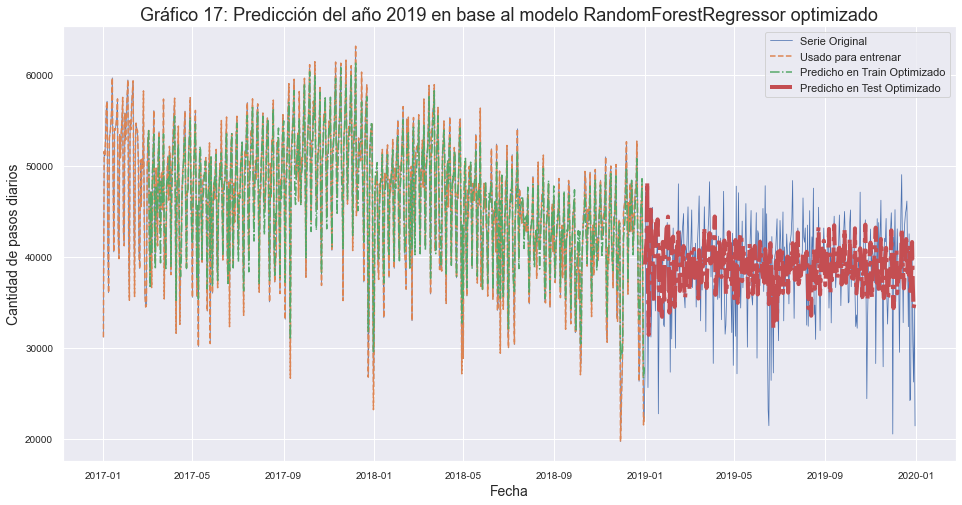

In [234]:
plt.figure(figsize = (16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back : look_back + N_train], y_train_pred_optimizado,'-.',label = 'Predicho en Train Optimizado')
plt.plot(senial.index[N_train + look_back : length_total - 1], y_test_pred_optimizado,'-.', lw = 4, label = 'Predicho en Test Optimizado')
plt.legend()
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Gráfico 17: Predicción del año 2019 en base al modelo RandomForestRegressor optimizado', fontsize = 18);
plt.xlabel('Fecha', fontsize = 14);
plt.ylabel('Cantidad de pasos diarios', fontsize = 14);
plt.show()

Raíz del error cuadrático medio en Train: 2124.0902530807434
Raíz del error cuadrático medio en Test: 5001.7285240589445
R2 en Train: 0.9125481721841079
R2 en Test: -0.020919649417872055


C:\Users\User\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


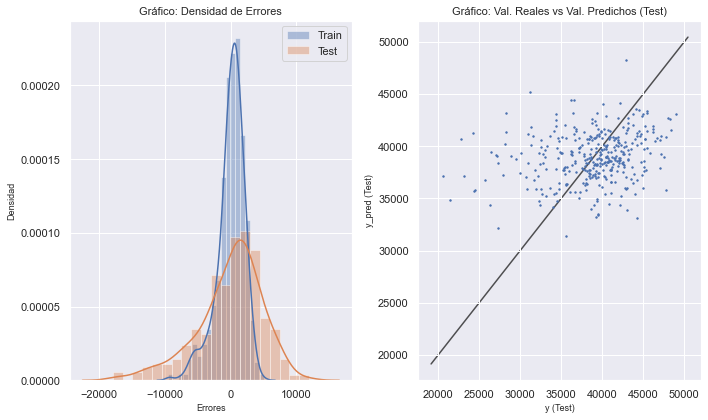

In [235]:
evaluar_regresion(rf_optimizado, X_train, X_test, y_train, y_test)

In [236]:
# La optimización del modelo lo empeora levemnte. Consecuentemente, podría intentarse incorporar otros hiperparámetros a la
# optimización; sin embargo, esto resulta muy costoso a nivel computacional.A pesar de esto, las métricas de error parecen ser
# menores que las del modelo benchmark.

# El histograma de los errores es relativamente simétrico, aproximadamente gaussiano, pero no parecido para ambos conjuntos, ya
# que el conjunto Test tiene mucha mayor dispersión y menor densidad que el conjunto Train. Esto es un indicador de que la
# aproximación a los datos se da de una manera que no es del todo correcta.

# En el gráfico y vs. y_pred para el conjunto de Test, la gran mayoría de los puntos está cerca de la diagonal (relación y = x);
# sin embargo, existe una gran proporción por fuera. No es completamente lo que se espera para un buen regresor.

##### Predicción del tráfico en la Autopista Illia para el último trimestre del 2019:

In [237]:
N_train = 1003 - look_back # Días desde 2017 hasta el 1° de Octubre de 2019.
N_test = 92 # Días desde el 1° de Octubre hasta el 31 de Diciembre de 2019.
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train : N_train + N_test,:]
y_test = y[N_train : N_train + N_test]
print(X_test.shape, y_test.shape)

(943, 60) (943,)
(91, 60) (91,)


In [238]:
y_train_pred_optimizado = rf_optimizado.predict(X_train)
y_test_pred_optimizado = rf_optimizado.predict(X_test)

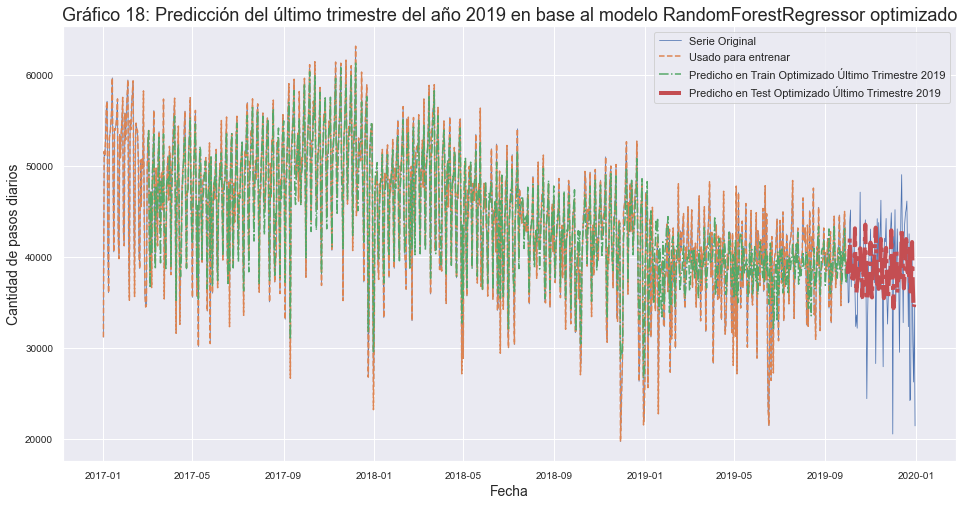

In [239]:
plt.figure(figsize = (16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back : look_back + N_train], y_train_pred_optimizado,'-.',label = 'Predicho en Train Optimizado Último Trimestre 2019')
plt.plot(senial.index[N_train + look_back : length_total - 1], y_test_pred_optimizado,'-.', lw = 4, label = 'Predicho en Test Optimizado Último Trimestre 2019')
plt.legend()
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Gráfico 18: Predicción del último trimestre del año 2019 en base al modelo RandomForestRegressor optimizado', fontsize = 18);
plt.xlabel('Fecha', fontsize = 14);
plt.ylabel('Cantidad de pasos diarios', fontsize = 14);
plt.show()

Raíz del error cuadrático medio en Train: 3206.8550162680426
Raíz del error cuadrático medio en Test: 5169.049914157986
R2 en Train: 0.8083688085074652
R2 en Test: 0.12413782014241392


C:\Users\User\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


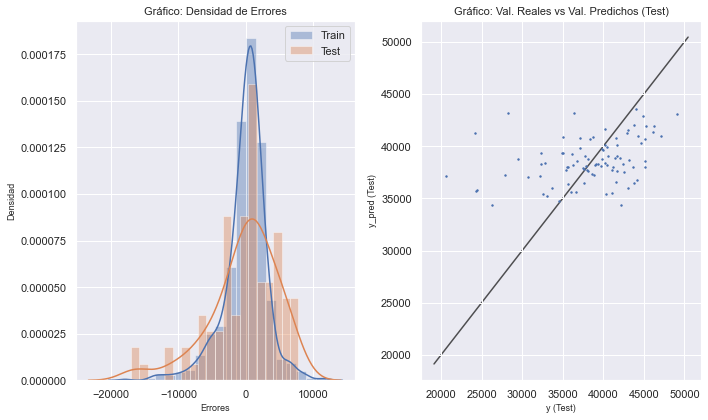

In [240]:
evaluar_regresion(rf_optimizado, X_train, X_test, y_train, y_test)

In [241]:
# Las métricas de error son peores, tanto en Train como en Test. El modelo parece tener inconvenientes para predecir los picos.
# Puede que esto se deba a la tendencia de la serie y a que esta no sea estacionaria.

# El histograma de los errores es relativamente simétrico y aproximadamente gaussiano para el conjunto Train. Sin embargo, en lo
# que respecta al conjunto Test, el mismo parece haber tomado una distribución asimétrica negativa. Además, el conjunto Test tiene
# mucha mayor dispersión y menor densidad que el conjunto Train. Al ser la distribución tan distinta para ambos conjuntos, se
# puede concluir que la aproximación a los datos se da de una manera que no es correcta.

# En el gráfico y vs. y_pred para el conjunto de Test, la gran mayoría de los puntos está cerca de la diagonal (relación y = x);
# sin embargo, existe una gran proporción por fuera. No es completamente lo que se espera para un buen regresor.

##### Predicción del tráfico en el año 2020 en base al modelo creado

In [242]:
# Se incorpora el Data Set de 2020 para poder hacer One Step Prediction (ya que sino se debería hacer Multi Step Prediction y
# arrastrar los errores de predicción de nuestro modelo):

data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')
data_2020.head()

periodo                fecha    mes        dia  dia_fecha  hora_inicio  \
0   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
1   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
2   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
3   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   
4   2020.0  2020-01-01 00:00:00  enero  Miércoles        1.0          0.0   

   hora_fin estacion tipo_vehiculo forma_pago  \
0       1.0  ALBERDI          Auto   Efectivo   
1       1.0  ALBERDI          Auto   Efectivo   
2       1.0  ALBERDI          Auto  Rec.Deuda   
3       1.0  ALBERDI          Auto  Rec.Deuda   
4       1.0  ALBERDI          Auto  Rec.Deuda   

                        observacion    sentido  cantidad_pasos  
0                          Efectivo     Centro            24.0  
1                          Efectivo  Provincia            80.0  
2                Paso en Infracción  Provincia             1.0  
3  Paso en infracción con Multa LPR     Centro             1.0  
4  Paso en infracción con Multa LPR  Provincia             1.0

In [243]:
# Nos quedamos solamente con la estación Illia y la forma de pago Efectivo:

mask_2020 = np.logical_and(data_2020.estacion == 'ILLIA', data_2020.forma_pago == 'Efectivo')
dataset_2020_mask = data_2020[mask_2020]

# Se quitan las columnas que no se utilizarán:

dataset_2020_mask.drop(columns = ['periodo', 'hora_inicio', 'forma_pago', 'estacion', 'dia', 'dia_fecha', 'mes', 'observacion'], inplace = True)
dataset_2020_mask.reset_index(inplace = True, drop = True)
dataset_2020_mask.head()

C:\Users\User\miniconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


fecha  hora_fin tipo_vehiculo    sentido  cantidad_pasos
0  2020-01-01 00:00:00       1.0          Auto     Centro           326.0
1  2020-01-01 00:00:00       1.0          Auto  Provincia           319.0
2  2020-01-01 00:00:00       2.0          Auto     Centro           199.0
3  2020-01-01 00:00:00       2.0          Auto  Provincia           180.0
4  2020-01-01 00:00:00       3.0          Auto     Centro           114.0

In [244]:
# Se pasa la columna fecha a formato datetime, y se le une la hora_fin como hora:

dataset_2020_mask['fecha2'] = pd.to_datetime(dataset_2020_mask.fecha) + pd.to_timedelta(dataset_2020_mask.hora_fin, unit = 'h')

# Se quitan las columnas fecha y hora_fin ya que las mismas se incluyen en el campo fecha2:

dataset_2020_mask.drop(columns=['fecha', 'hora_fin'], inplace = True)

# Se corrige el nombre de fecha2 a fecha:

dataset_2020_mask.rename(columns = {'fecha2' : 'fecha'}, inplace = True) 

# Se reordena el dataset por fecha:

dataset_2020_mask.sort_values('fecha', inplace = True)
dataset_2020_mask.reset_index(drop=True, inplace = True)
dataset_2020_mask

<ipython-input-244-bae861f1a627>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_2020_mask['fecha2'] = pd.to_datetime(dataset_2020_mask.fecha) + pd.to_timedelta(dataset_2020_mask.hora_fin, unit = 'h')
C:\Users\User\miniconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\User\miniconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:4293: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

tipo_vehiculo    sentido  cantidad_pasos               fecha
0                Moto     Centro             7.0 2020-01-01 00:00:00
1                Auto  Provincia           423.0 2020-01-01 00:00:00
2                Auto     Centro           467.0 2020-01-01 00:00:00
3                Moto  Provincia             6.0 2020-01-01 00:00:00
4      Pesados 2 Ejes     Centro             1.0 2020-01-01 00:00:00
...               ...        ...             ...                 ...
52369            Auto  Provincia           222.0 2020-12-31 20:00:00
52370            Auto  Provincia           106.0 2020-12-31 21:00:00
52371            Moto     Centro             5.0 2020-12-31 21:00:00
52372            Moto  Provincia             1.0 2020-12-31 21:00:00
52373            Auto     Centro           103.0 2020-12-31 21:00:00

[52374 rows x 4 columns]

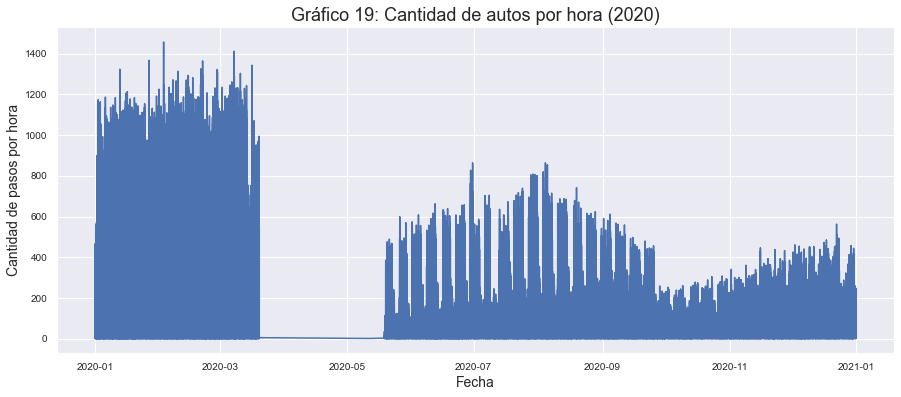

In [245]:
# Se grafican los datos (por hora) de 2020:

plt.figure(figsize = (15,6))
plt.plot(dataset_2020_mask.fecha, dataset_2020_mask.cantidad_pasos)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Fecha', fontsize = 14);
plt.ylabel('Cantidad de pasos por hora', fontsize = 14);
plt.title('Gráfico 19: Cantidad de autos por hora (2020)', fontsize = 18);
plt.show()

In [246]:
# Se resamplean los datos para agrupar por dia:

diario_2020 = dataset_2020_mask.resample('D', on = 'fecha').sum()
print(diario_2020.shape)
diario_2020.head()

(366, 1)


cantidad_pasos
fecha                     
2020-01-01         21395.0
2020-01-02         33722.0
2020-01-03         37067.0
2020-01-04         30627.0
2020-01-05         27812.0

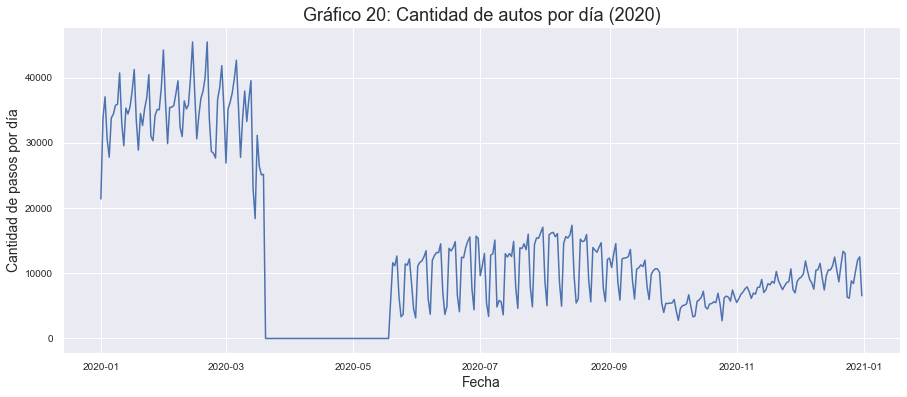

In [247]:
plt.figure(figsize = (15, 6))
plt.plot(diario_2020.index, diario_2020.cantidad_pasos)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Fecha', fontsize = 14);
plt.ylabel('Cantidad de pasos por día', fontsize = 14);
plt.title('Gráfico 20: Cantidad de autos por día (2020)', fontsize = 18);
plt.show()

In [248]:
# Como puede contemplarse en el gráfico precedente, la cantidad de pasos por el peaje se derrumbó desde fines de Marzo de 2021,
# llegando incluso a ser 0 por varios meses. Esto se debió, como es de público conocimiento, a la cuarentena implementada (y la
# consecuente disminución del tráfico) y al hecho de que el Gobierno de la Ciudad de Buenos Aires liberó el pago de los peajes
# hasta fines de Mayo para desincentivar la utilización de transporte público. Asimismo, puede observarse una nueva y marcada
# disminución de los pagos en efectivo desde fines de Septiembre, ya que en dicho momento se implementó la utilización obligatoria
# del Telepase.

In [249]:
# Se concatena el dataset de los años 2017, 2018 y 2019 con el generado para el año 2020:

diario_total = pd.concat([diario, diario_2020])
print(diario.shape)
print(diario_total.shape)

(1095, 2)
(1461, 2)


In [250]:
senial_total = diario_total.cantidad_pasos
senial_total.head()

fecha
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
Freq: D, Name: cantidad_pasos, dtype: float64

In [251]:
# Se genera la tabla VACÍA con la que se entrenará el modelo:

N = senial_total.shape[0]
X = np.zeros((N - look_back - 1, look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1400, 60) (1400,)


In [252]:
# Se llena la tabla con los datos de las observaciones:

for i in range(X.shape[0]):
#     X[i,:] = senial_total.values.iloc[i : i + look_back]
#     y[i] = senial_total.values.iloc[ i + look_back]
    X[i,:] = senial_total.iloc[i : i + look_back]
    y[i] = senial_total.iloc[i + look_back]

In [253]:
N_train = 3 * 365 - look_back # Se entrena el modelo con los datos de los años 2017, 2018, 2019.
N_test = 1 * 366 # Se testea el modelo con los datos del año 2020 (bisiesto).
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(1035, 60) (1035,)
(365, 60) (365,)


In [254]:
# Se utiliza el modelo optimizado para predecir:

y_train_pred_optimizado = rf_optimizado.predict(X_train)
y_test_pred_optimizado = rf_optimizado.predict(X_test)

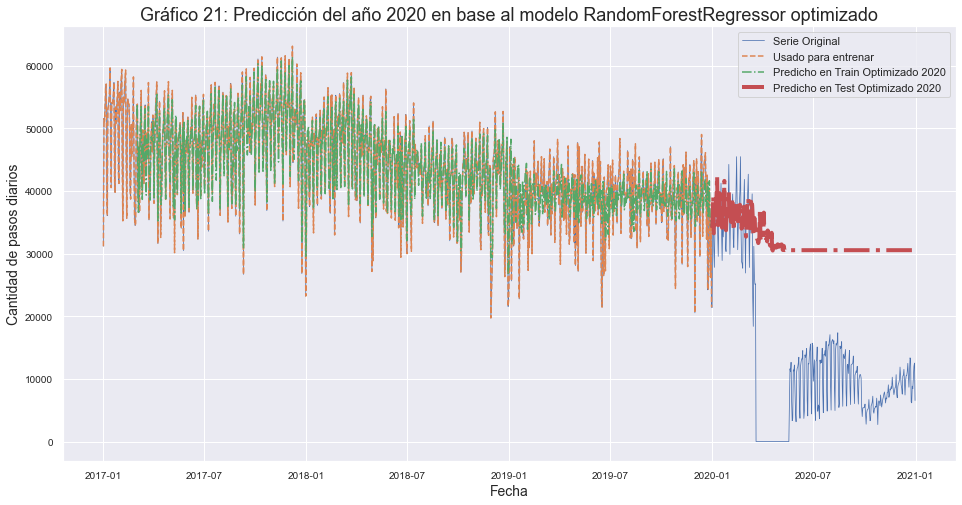

In [255]:
plt.figure(figsize = (16,8))
plt.plot(senial_total.index[:length_total], senial_total[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial_total.index[:N_train + look_back], senial_total[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial_total.index[look_back : look_back + N_train], y_train_pred_optimizado,'-.',label = 'Predicho en Train Optimizado 2020')
plt.plot(senial_total.index[N_train + look_back : length_total - 1], y_test_pred_optimizado,'-.', lw = 4, label = 'Predicho en Test Optimizado 2020')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend()
plt.title('Gráfico 21: Predicción del año 2020 en base al modelo RandomForestRegressor optimizado', fontsize = 18);
plt.xlabel('Fecha', fontsize = 14);
plt.ylabel('Cantidad de pasos diarios', fontsize = 14);
plt.show()

In [256]:
# El derrumbe en la cantidad de pasos por el peaje pagados con efectivo es imposible de predecir por parte del modelo.

Raíz del error cuadrático medio en Train: 3449.7681029290998
Raíz del error cuadrático medio en Test: 21294.85607732732
R2 en Train: 0.7824634795747936
R2 en Test: -2.0379950447320394


C:\Users\User\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


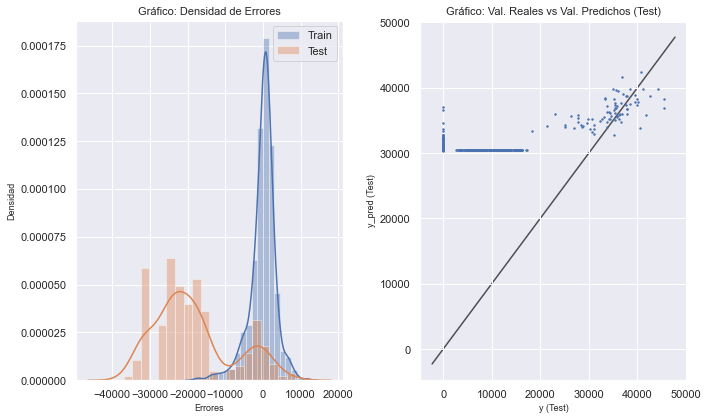

In [257]:
evaluar_regresion(rf_optimizado, X_train, X_test, y_train, y_test)

In [258]:
# Las métricas de error disminuyen considerablemente respecto de las predicciones del año anterior (sobre todo en Train).

# El histograma de los errores es relativamente simétrico y aproximadamente gaussiano para el conjunto Train. Sin embargo, en lo
# que respecta al conjunto Test, el mismo parece haber tomado una distribución bimodal. Además, el conjunto Test tiene mucha
# mayor dispersión y menor densidad que el conjunto Train. Al ser la distribución tan distinta para ambos conjuntos, se puede
# concluir que la aproximación a los datos se da de una manera que no es correcta.

# En el gráfico y vs. y_pred para el conjunto de Test, una parte de los puntos está cerca de la diagonal (relación y = x); sin
# embargo, existe una enorme proporción por fuera y alejado de la misma. No es lo que se espera para un buen regresor.

#### Para pensar, investigar y, opcionalmente, implementar

##### ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.?

In [259]:
# Podría analizarse la serie del tiempo con una menor cantidad de filtros para poder tener una predicción más similar al tráfico.
# Del mismo modo, sería posible filtrar el día de vehículo para analizar en que horarios hay mayor transito de camiones o, por
# el contrario, de particulares. Mediante la incorporación del Telepase podría lograrse una visualización más realista y mejores
# predicciones acerca del flujo vehiculos que transitan por la autopista.

##### ¿Hay algo que te gustaría investigar o probar?

In [260]:
# Me gustaría incorporar los datos del Telepase a la serie de tiempo y, de ser necesario, hacer alguna transformación (diferenciarla o
# aplicarle un logaritmo) para que la misma sea estacionaria y analizar si los resultados del modelo mejoran gracias a ello.
# También se podría suavizar un poco más la serie para que no tenga tanto ruido pero, en caso de hacer esto, posiblemente habría
# que incorporar nuevos datos ya que contaríamos con una sustencial merma en los mismos.

# Proyecto 04 - Series de Tiempo

#### Desafío: ¿mejora el modelo con la incorporación de otros medios de pago, suavizando aún más y haciendo una transformación de la serie de tiempo para que la misma sea estacionaria?

In [261]:
# El objetivo sería eliminar la tendencia declinante de la serie y volverla estacionaria, ya que es sabido que estos algoritmos
# funcionan óptimamente con este tipo de series de tiempo. Asimismo, al suavizar un poco más la serie, se intentará sacar un
# poco de ruido y errores en las predicciones futuras. Espero que los errores de predicción disminuyan un poco, aunque no de modo
# considerable, ya que para lograr esto se debería contar con muchos más datos.

#### Análisis exploratorio y preprocesamiento de los datos

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [263]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

##### Incorporación de otros medios de pago a la serie de tiempo

In [264]:
# Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas:
dataset = pd.concat([data_2019, data_2018, data_2017])

# Nos quedamos solamente con la estación Illia y, a diferencia del Proyecto 3, con todos los medios de pago:
dataset = dataset[(dataset.estacion == 'Illia')]

# Quitamos las columnas que no vamos a utilizar:
dataset.drop(columns = ['periodo', 'hora_inicio', 'forma_pago', 'estacion'], inplace = True)

dataset.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
19  2019-01-01         1  Martes     Centro       Liviano             146
20  2019-01-01         1  Martes     Centro       Liviano              59
21  2019-01-01         1  Martes     Centro        Pesado               1
22  2019-01-01         1  Martes  Provincia       Liviano             147
23  2019-01-01         1  Martes  Provincia       Liviano             106

In [265]:
# Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora:
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

# Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2:
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
19  Martes     Centro       Liviano             146 2019-01-01 01:00:00
20  Martes     Centro       Liviano              59 2019-01-01 01:00:00
21  Martes     Centro        Pesado               1 2019-01-01 01:00:00
22  Martes  Provincia       Liviano             147 2019-01-01 01:00:00
23  Martes  Provincia       Liviano             106 2019-01-01 01:00:00

In [266]:
# Corregimos el nombre de fecha2 a fecha:

dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
19  Martes     Centro       Liviano             146 2019-01-01 01:00:00
20  Martes     Centro       Liviano              59 2019-01-01 01:00:00
21  Martes     Centro        Pesado               1 2019-01-01 01:00:00
22  Martes  Provincia       Liviano             147 2019-01-01 01:00:00
23  Martes  Provincia       Liviano             106 2019-01-01 01:00:00

In [267]:
# Reordenamos el dataset por fecha:

dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Domingo     Centro       Liviano             459 2017-01-01 00:00:00
1       Domingo  Provincia        Pesado               3 2017-01-01 00:00:00
2       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
3       Domingo  Provincia        Pesado               7 2017-01-01 00:00:00
4       Domingo  Provincia        Pesado               6 2017-01-01 00:00:00
...         ...        ...           ...             ...                 ...
752547   Martes     Centro       Liviano             122 2019-12-31 23:00:00
752548   Martes     Centro       Liviano               3 2019-12-31 23:00:00
752549   Martes     Centro       Liviano               4 2019-12-31 23:00:00
752550   Martes     Centro       Liviano               1 2019-12-31 23:00:00
752551   Martes     Centro       Liviano             214 2019-12-31 23:00:00

[752552 rows x 5 columns]

##### Suavización de la serie de tiempo para reducir el ruido y los errores

In [268]:
# Resampleamos nuestros datos para agrupar por MES, con el fin de suavizar la serie de tiempo y lograr una visualización mas amigable:

mensual = dataset.resample('M', on = 'fecha').sum()
print(mensual.shape)
mensual.head(36)

(36, 1)


cantidad_pasos
fecha                     
2017-01-31         2639365
2017-02-28         2364688
2017-03-31         2734740
2017-04-30         2629246
2017-05-31         2756833
2017-06-30         2726986
2017-07-31         2827076
2017-08-31         2921152
2017-09-30         2935394
2017-10-31         3089570
2017-11-30         3084645
2017-12-31         2860889
2018-01-31         2639969
2018-02-28         2551479
2018-03-31         3075393
2018-04-30         2908388
2018-05-31         3037557
2018-06-30         2825621
2018-07-31         2928270
2018-08-31         3072788
2018-09-30         2849384
2018-10-31         2990326
2018-11-30         2829937
2018-12-31         2780926
2019-01-31         2600777
2019-02-28         2607024
2019-03-31         3026728
2019-04-30         2725833
2019-05-31         2986778
2019-06-30         2691338
2019-07-31         2936927
2019-08-31         2990406
2019-09-30         2875084
2019-10-31         2951778
2019-11-30         2983892
2019-12-31         2778602

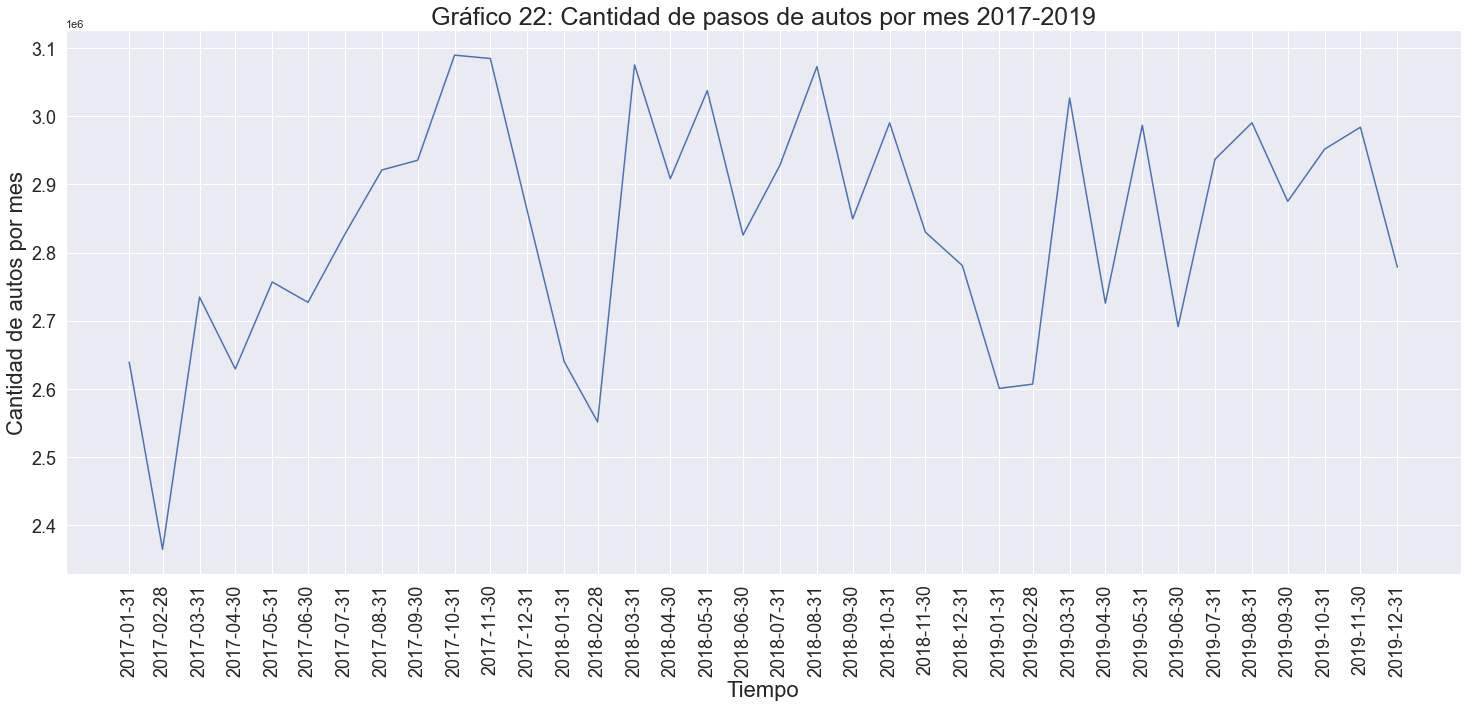

In [269]:
sns.set(rc = {'figure.figsize':(25,10)})
plt.plot(mensual.index, mensual.cantidad_pasos)
plt.xticks(mensual.index, rotation = 90)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Tiempo', fontsize = 22)
plt.ylabel('Cantidad de autos por mes', fontsize = 22)
plt.title("Gráfico 22: Cantidad de pasos de autos por mes 2017-2019", fontsize = 25)
plt.show()

In [270]:
# Como se puede apreciar en el gráfico precedente, la cantidad de pasos en cada uno de los meses de los tres años analizados
# es variable, aunque relativamente similar. Los ciclos mensuales parecen tener cierta coincidencia entre cada uno de los años.
# Puede observarse una abrupta caída en el tráfico en los meses de Enero y Febrero. Podría suponerse que esto se debe al período
# de vacaciones, que sería coincidente con una menor concurrencia de las personas al centro de la ciudad (trayecto de la Autopista
# Illia). NO SE UTILIZARÁ ESTE RESAMPLEO PARA EL MODELO DE MACHINE LEARNING YA QUE LA CANTIDAD DE DATOS SE REDUCE ENORMEMENTE,
# PASANDO A TAN SOLO 36.

In [271]:
# Resampleamos nuestros datos para agrupar por SEMANA, con el fin de suavizar la serie de tiempo (para reducir errores de
# predicción) y lograr una visualización mas amigable:

semanal = dataset.resample('W', on = 'fecha').sum()
print(semanal.shape)
semanal.head(158)

(158, 1)


cantidad_pasos
fecha                     
2017-01-01           45478
2017-01-08          585700
2017-01-15          613675
2017-01-22          599307
2017-01-29          598163
...                    ...
2019-12-08          707644
2019-12-15          658014
2019-12-22          724497
2019-12-29          525807
2020-01-05          127053

[158 rows x 1 columns]

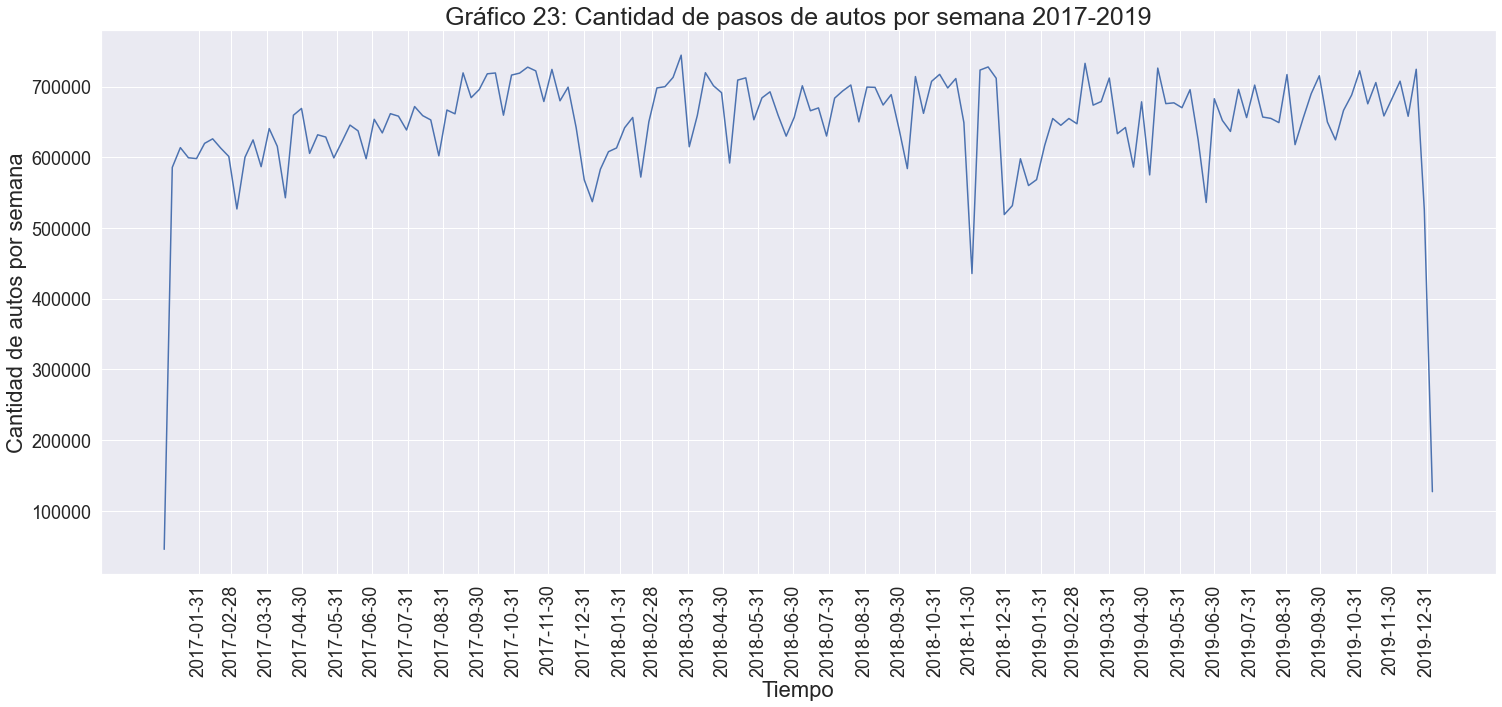

In [272]:
sns.set(rc = {'figure.figsize':(25,10)})
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xticks(mensual.index, rotation = 90)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Tiempo', fontsize = 22)
plt.ylabel('Cantidad de autos por semana', fontsize = 22)
plt.title("Gráfico 23: Cantidad de pasos de autos por semana 2017-2019", fontsize = 25)
plt.show()

In [273]:
# Como se puede contemplar, al resamplear por semana el tráfico parece ser más constante y las caídas no tan abruptas. Sin embargo,
# puede sacarse conclusiones similares a las del gráfico anterior.

##### Filtrado de valores atípicos

In [274]:
# Con el objeto de eliminar las caídas abruptas en los extremos de la serie de tiempo (debido a que existe menos cantidad de
# datos con los cuales agrupar por semana) se realiza un filtrado de valores atípicos con interpolate.

In [275]:
media_cantidad_pasos = np.mean(semanal.cantidad_pasos)
std_cantidad_pasos = np.std(semanal.cantidad_pasos)
minimo_cantidad_pasos = media_cantidad_pasos - 3 * std_cantidad_pasos
maximo_cantidad_pasos = media_cantidad_pasos + 3 * std_cantidad_pasos
print("Cantidad de Pasos Semanales")
print("Media:", media_cantidad_pasos)
print("Desvío Estándar:", std_cantidad_pasos)
print("Cantidad de Pasos MÍNIMA:", minimo_cantidad_pasos)
print("Cantidad de Pasos MÁXIMA:", maximo_cantidad_pasos)

Cantidad de Pasos Semanales
Media: 646935.3734177215
Desvío Estándar: 82526.98140918798
Cantidad de Pasos MÍNIMA: 399354.42919015756
Cantidad de Pasos MÁXIMA: 894516.3176452854


In [276]:
semanal.isna().sum()

cantidad_pasos    0
dtype: int64

In [277]:
semanal.cantidad_pasos[semanal.cantidad_pasos > maximo_cantidad_pasos] = np.nan
semanal.cantidad_pasos[semanal.cantidad_pasos < minimo_cantidad_pasos] = np.nan

In [278]:
semanal.isna().sum()

cantidad_pasos    2
dtype: int64

In [279]:
semanal[semanal['cantidad_pasos'].isnull()].index.tolist()

[Timestamp('2017-01-01 00:00:00', freq='157W-SUN'),
 Timestamp('2020-01-05 00:00:00', freq='157W-SUN')]

In [280]:
semanal.head(8)

cantidad_pasos
fecha                     
2017-01-01             NaN
2017-01-08        585700.0
2017-01-15        613675.0
2017-01-22        599307.0
2017-01-29        598163.0
2017-02-05        619701.0
2017-02-12        626109.0
2017-02-19        612954.0

In [281]:
semanal.tail(8)

cantidad_pasos
fecha                     
2019-11-17        705733.0
2019-11-24        658474.0
2019-12-01        682974.0
2019-12-08        707644.0
2019-12-15        658014.0
2019-12-22        724497.0
2019-12-29        525807.0
2020-01-05             NaN

In [282]:
# En este caso se utilizará la media movil semanal con el fin de llenar los nulos, ya que al tener menos cantidad de datos
# posiblemente sea más arriesgado utilziar interpolate (que toma el dato anterior y lo replica para llenar el valor nulo).

semanal['cantidad_pasos'] = semanal.cantidad_pasos.fillna(semanal.cantidad_pasos.rolling(7, min_periods = 1).mean())

In [283]:
semanal.isna().sum()

cantidad_pasos    1
dtype: int64

In [284]:
semanal[semanal['cantidad_pasos'].isnull()].index.tolist()

[Timestamp('2017-01-01 00:00:00', freq='W-SUN')]

In [285]:
semanal.tail(8)

cantidad_pasos
fecha                     
2019-11-17   705733.000000
2019-11-24   658474.000000
2019-12-01   682974.000000
2019-12-08   707644.000000
2019-12-15   658014.000000
2019-12-22   724497.000000
2019-12-29   525807.000000
2020-01-05   659568.333333

In [286]:
semanal[semanal['cantidad_pasos'].isnull()].index.tolist()

[Timestamp('2017-01-01 00:00:00', freq='W-SUN')]

In [287]:
semanal.head(8)

cantidad_pasos
fecha                     
2017-01-01             NaN
2017-01-08        585700.0
2017-01-15        613675.0
2017-01-22        599307.0
2017-01-29        598163.0
2017-02-05        619701.0
2017-02-12        626109.0
2017-02-19        612954.0

In [288]:
# En este caso, como se debe llenar un nulo con una medida de tendencia central de datos posteriores, hay que utilizar .shift:

semanal['cantidad_pasos'] = semanal.cantidad_pasos.fillna(semanal.cantidad_pasos.rolling(7, min_periods = 1).mean().shift(-7))

In [289]:
semanal.head(8)

cantidad_pasos
fecha                     
2017-01-01   607944.142857
2017-01-08   585700.000000
2017-01-15   613675.000000
2017-01-22   599307.000000
2017-01-29   598163.000000
2017-02-05   619701.000000
2017-02-12   626109.000000
2017-02-19   612954.000000

In [290]:
semanal.isna().sum()

cantidad_pasos    0
dtype: int64

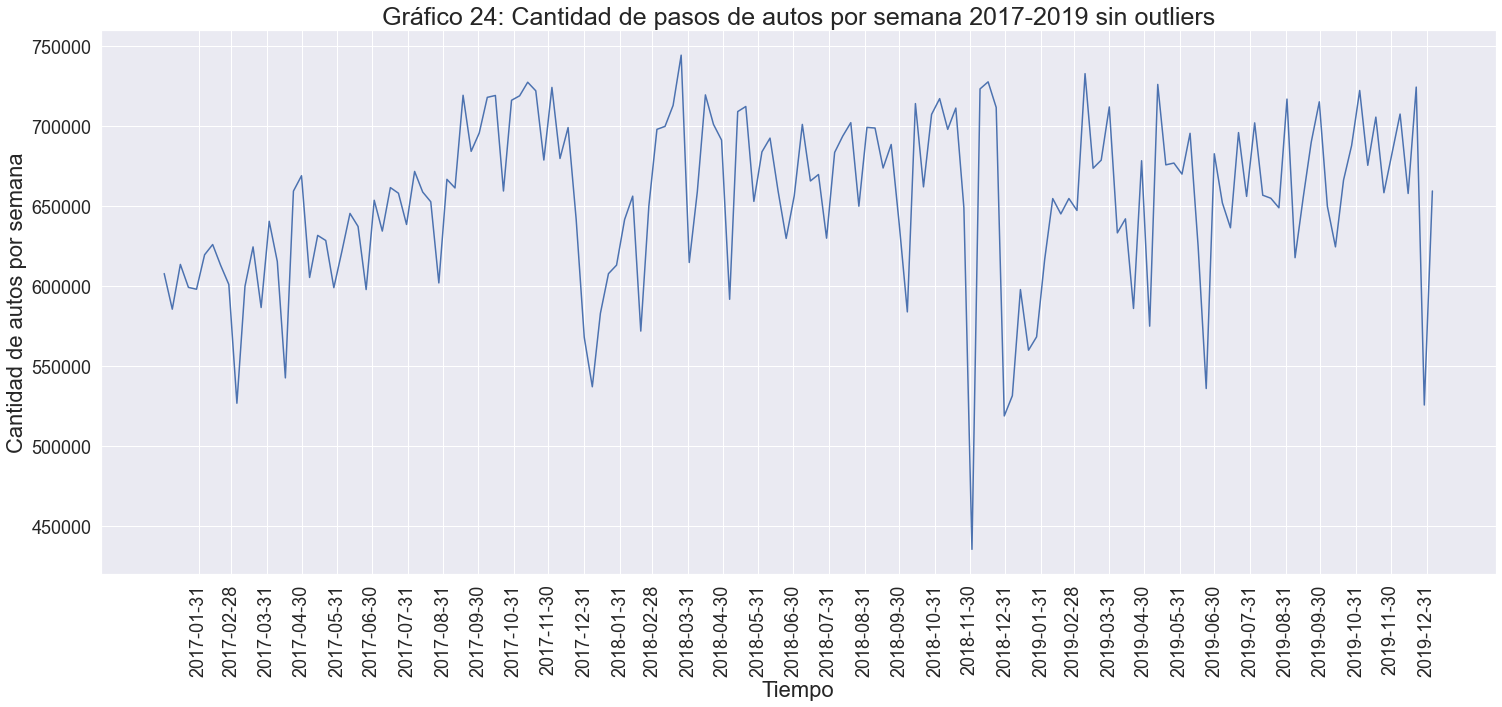

In [291]:
sns.set(rc = {'figure.figsize':(25,10)})
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xticks(mensual.index, rotation = 90)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Tiempo', fontsize = 22)
plt.ylabel('Cantidad de autos por semana', fontsize = 22)
plt.title("Gráfico 24: Cantidad de pasos de autos por semana 2017-2019 sin outliers", fontsize = 25)
plt.show()

##### Prueba de Dickey-Fuller Aumentada (para determinar la Estacionariedad de la Serie de Tiempo)

In [292]:
from statsmodels.tsa.stattools import adfuller
X = semanal.cantidad_pasos
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.927136
p-value: 0.000000
Critical Values:
	1%: -3.473
	5%: -2.880
	10%: -2.577


In [293]:
# El ADF Test muestra que el p valor (significancia) da menor a 0,05 (en este caso 0.00). Por lo tanto, se puede rechazar la
# hipótesis nula, lo que quiere decir que la serie ES ESTACIONARIA.

# Al ser la serie estacionaria, no va a hacer falta aplicar un logaritmo o diferenciarla. Debido a que es estable a lo largo del
# tiempo, por tener una media y varianza relativamente invariables, se puede asumir que será más facil predecir ya que la serie
# no es errática.

# Igualmente hay que tener en cuenta que este tipo de pruebas deben usarse con precaución porque, como la mayoría de las pruebas
# de raíz unitaria, tiene una tasa de error de Tipo I relativamente alta.

##### Componentes estacionales y tendencia de la serie

###### Gráfico 25: Descomposición de la Serie de Tiempo

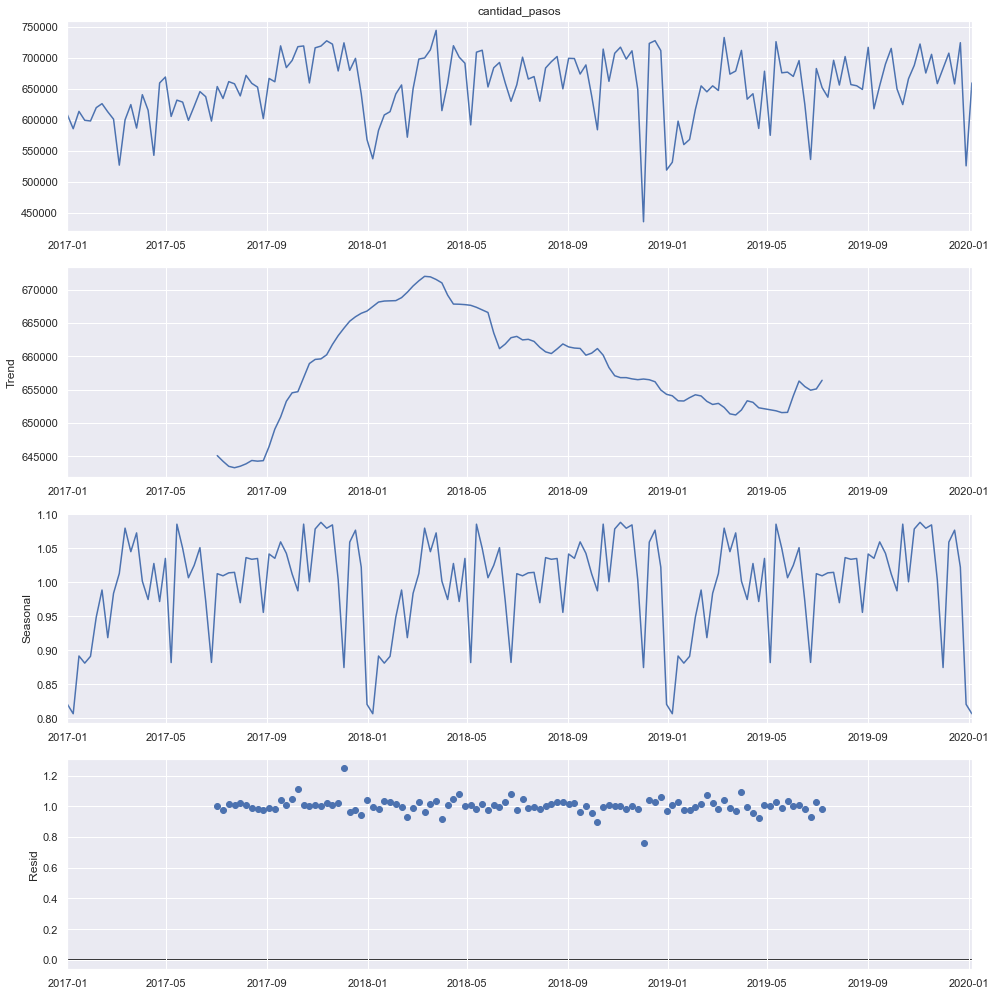

In [294]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib

result = seasonal_decompose(semanal.cantidad_pasos, model = 'multiplicative')

matplotlib.rcParams['figure.figsize'] = [14, 14]
result.plot()
plt.show()

In [295]:
# Como se puede apreciar, la tendencia (Trend) está bastante afectada por la baja cantidad de datos. Consecuentemente, se
# puede ver un marcado crecimiento desde 2017 a 2018 y luego un paulativo decrecimiento y estabilización de la serie hacia
# 2019. Asimismo, se puede ver que existen ciclos mensuales relativamente constantes (caída en el tráfico durante los meses de
# verano, por ejemplo). Por último, a simple vista podría inferirse que los residuos (Resid) son azarosos y por ruido blanco, ya
# que casi todos los puntos están a una misma altura, distribuidos de modo bastante uniforme. No obstante ello, para considerarse
# que los residuos son completamente azarosos, la media debería ser 0, lo cual no parece cumplirse.

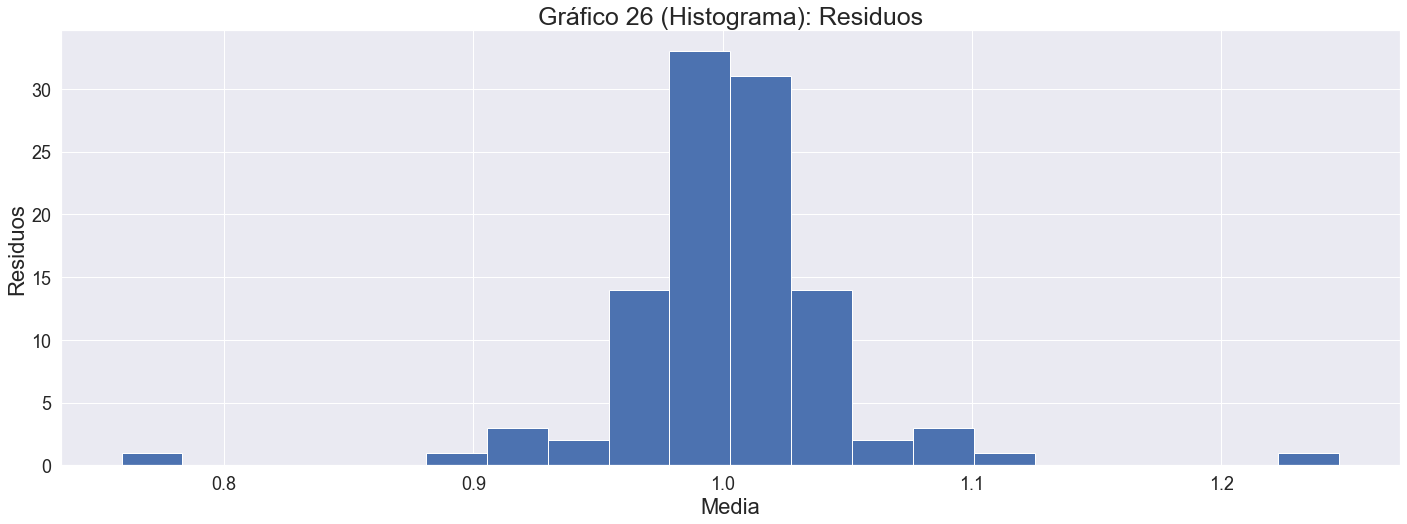

In [296]:
plt.figure(figsize = (24,8))
plt.hist(result.resid, bins = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Gráfico 26 (Histograma): Residuos', fontsize = 25);
plt.xlabel('Media', fontsize = 22);
plt.ylabel('Residuos', fontsize = 22);
plt.show()

In [297]:
# Como puede apreciarse, el histograma es bastante simétrico, de modo que podríamos deducir que los residuos de la serie con
# la que se está trabajando son mayormente consecuencia de ruido blanco.

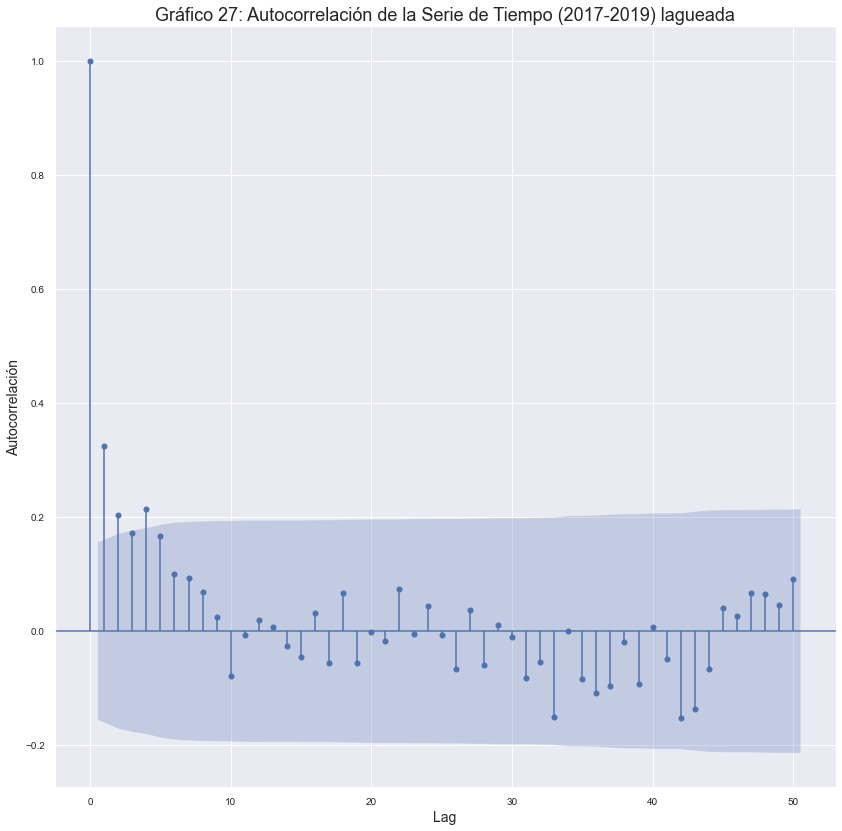

In [298]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(semanal.cantidad_pasos, lags = 50)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Gráfico 27: Autocorrelación de la Serie de Tiempo (2017-2019) lagueada', fontsize = 18);
plt.xlabel('Lag', fontsize = 14);
plt.ylabel('Autocorrelación', fontsize = 14);
plt.show()

In [299]:
# Como puede verse en el gráfico precedente, existen muy pocos valores de autocorrelación significativos (por fuera del intervalo
# de confianza), lo que quiere decir que la serie parecería ser estacionaria. Asimismo, parece confirmarse la existencia de un
# ciclo autocorrelacionado entre las distintas semanas del año.

##### Transformación One Step Prediction

In [300]:
senial = semanal.cantidad_pasos
senial.head()

fecha
2017-01-01    607944.142857
2017-01-08    585700.000000
2017-01-15    613675.000000
2017-01-22    599307.000000
2017-01-29    598163.000000
Freq: W-SUN, Name: cantidad_pasos, dtype: float64

In [301]:
# Se define la cantidad de datos (semanas) con los que se predecirá:

look_back = 8

In [302]:
# Se genera la tabla VACÍA con la que se entrenará el modelo:

N = senial.shape[0]
X = np.zeros((N - look_back - 1, look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(149, 8) (149,)


In [303]:
# Se llena la tabla con los datos de las observaciones:

for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

In [304]:
# Se define que se entrenará al modelo en base a datos de 106 semanas del dataset y se lo evaluará con las 52 restantes:

N_train = 2 * 53 - look_back
N_test = 1 * 52
N_total = N_train + N_test

length_total = N_train + N_test + look_back
                                            
X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train : N_train + N_test,:]
y_test = y[N_train : N_train + N_test]
print(X_test.shape, y_test.shape)

(98, 8) (98,)
(51, 8) (51,)


#### Modelo de Machine Learning nuevo, no visto en la carrera

In [305]:
# Se elige para generar el Modelo de Machine Learning nuevo al algoritmo ElasticNet, el cual consiste en una regresión lineal
# que combina dos regularizaciones o penalizaciones: L1 y L2. La elección del mismo se debe a su simplicidad, confiabilidad y
# al hecho de que funciona bien para bases de datos con pocas features relevantes; es decir, es indicado para este análisis.
# Es fácil de aplicar y de interpretar.

In [306]:
from sklearn.linear_model import ElasticNet

en = ElasticNet().fit(X_train, y_train)

In [307]:
y_pred = en.predict(X)
y_train_pred = en.predict(X_train)
y_test_pred = en.predict(X_test)

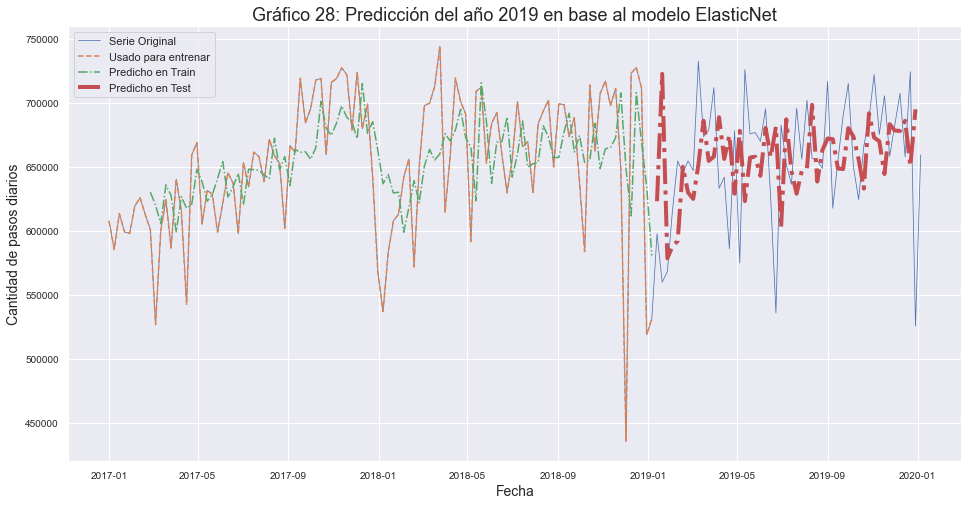

In [308]:
plt.figure(figsize = (16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back : look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train + look_back : length_total - 1], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Gráfico 28: Predicción del año 2019 en base al modelo ElasticNet', fontsize = 18);
plt.xlabel('Fecha', fontsize = 14);
plt.ylabel('Cantidad de pasos diarios', fontsize = 14);
plt.show()

In [309]:
# Se genera una función para evaluar regresiones:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def evaluar_regresion(model, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### CALCULAMOS EL ERROR
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f'R2 en Train: {r2_train}')
    print(f'R2 en Test: {r2_test}')
    
    ### GRAFICAMOS LOS RESULTADOS
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'Train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'Test')
    plt.title('Gráfico: Densidad de Errores', fontsize = 11, loc = 'center', wrap = True);
    plt.xlabel('Errores', fontsize = 9)
    plt.ylabel('Densidad', fontsize = 9)
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s = 2)
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
   
    ax.plot(lims, lims, 'k-', alpha = 0.75, zorder = 0)
    plt.title('Gráfico: Val. Reales vs Val. Predichos (Test)', fontsize = 11, loc = 'center', wrap = True)
    plt.xlabel('y (Test)', fontsize = 9)
    plt.ylabel('y_pred (Test)', fontsize = 9)

    plt.tight_layout()
    plt.show()

Raíz del error cuadrático medio en Train: 48788.36707216867
Raíz del error cuadrático medio en Test: 58149.83817008102
R2 en Train: 0.22905508062857582
R2 en Test: -0.48056647029061605


C:\Users\User\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


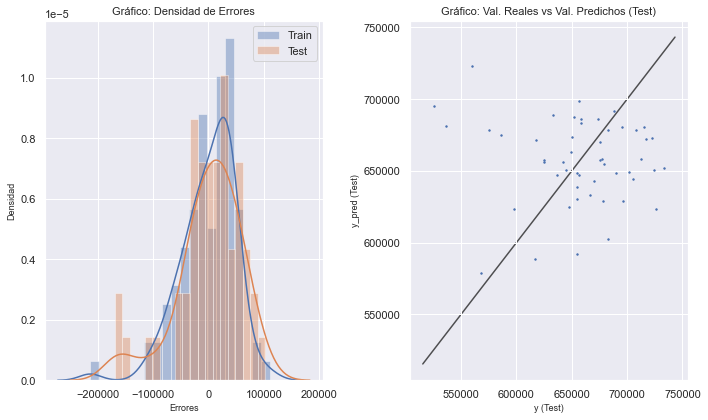

In [310]:
evaluar_regresion(en, X_train, X_test, y_train, y_test)

In [311]:
# El modelo aparenta ser bastante impreciso tanto en Train como en Test. Esto podría deberse a la baja cantidad de datos con
# los que cuenta el algoritmo, como consecuencia del resampleo semanal. Pareciera que la dificultad radica al momento de predecir
# los grandes saltos o picos.

# El histograma de los errores es relativamente simétrico, aproximadamente gaussiano y muy parecido para ambos conjuntos, lo que
# significaría que este nuevo regresor (gracias a sus regularizaciones) tiene buena capacidad para evitar sobreajustes. Esto es
# un indicador de que la aproximación a los datos se da de una manera correcta.

# En el gráfico y vs. y_pred para el conjunto de Test, la gran mayoría de los puntos está cerca de la diagonal (relación y = x);
# sin embargo, existe una buena proporción por fuera. No es completamente lo que se espera para un buen regresor.

#### Conculsiones

In [312]:
# Si bien este último modelo pareciera no tener resultados óptimos, es posible destacar algunos avances respecto del Proyecto
# 3: se logró trabajar con una serie de tiempo estacionaria y sin tanto ruido ya que está más suavizada. Además, la misma es más
# fácil de interpretar y analizar.

# Por el contrario, como falencias de este último modelo pueden mencionarse: al haberse suavizado la serie de tiempo se redujo
# significativamente la cantidad de datos, lo cual va en contra de la capacidad predictora del algorimo. Por último, fue usado
# un nuevo modelo de Machine Learning, del cual se tiene poca experiencia y conocimiento. Los hiperparámetros del mismo no fueron
# optimizados.

# Como recomendaciones de cara al futuro y con el fin de mejorar las predicciones podrían nombrarse:
# -Incorporar datos de años anteriores a la serie de tiempo;
# -Elegir al algoritmo más indicado;
# -Optimizar hiperparámetros.

#### Incorporación de información de otra fuente al proyecto

Se intentará corroborar el dato brindado por la siguiente fuente, donde se afirma que "en las primeras diez horas del día (29/06/2020) circularon 33.000 vehículos por las autopistas porteñas. Esto equivale a un tercio menos que el lunes de la semana pasada (22/06/2020)".

https://www.cronista.com/economia-politica/Cuanto-se-redujo-la-circulacion-en-el-AMBA-en-la-previa-a-la-cuarentena-dura-20200629-0024.html

In [313]:
data_2020f = data_2020.drop(columns = ['periodo', 'hora_inicio', 'forma_pago', 'estacion', 'dia', 'dia_fecha', 'mes', 'observacion'])
data_2020f.reset_index(inplace = True, drop = True)
data_2020f['fecha2'] = pd.to_datetime(data_2020f.fecha) + pd.to_timedelta(data_2020f.hora_fin, unit = 'h')
data_2020f.drop(columns=['fecha', 'hora_fin'], inplace = True)
data_2020f.rename(columns = {'fecha2' : 'fecha'}, inplace = True) 
data_2020f.sort_values('fecha', inplace = True)
data_2020f.reset_index(drop=True, inplace = True)
data_2020f = data_2020f.resample('H', on = 'fecha').sum()
data_2020f.head()

cantidad_pasos
fecha                              
2020-01-01 00:00:00          8199.0
2020-01-01 01:00:00          5519.0
2020-01-01 02:00:00          3251.0
2020-01-01 03:00:00          2018.0
2020-01-01 04:00:00          1976.0

##### 22/06/2020

In [314]:
data_2020f.reset_index(inplace = True)
data_2020f_22 = data_2020f[(data_2020f.fecha > "2020-06-22 00:00:00") & (data_2020f.fecha <= "2020-06-22 10:00:00")]
data_2020f_22

fecha  cantidad_pasos
4153 2020-06-22 01:00:00          1257.0
4154 2020-06-22 02:00:00           998.0
4155 2020-06-22 03:00:00           870.0
4156 2020-06-22 04:00:00           889.0
4157 2020-06-22 05:00:00          1733.0
4158 2020-06-22 06:00:00          5310.0
4159 2020-06-22 07:00:00          8934.0
4160 2020-06-22 08:00:00         12680.0
4161 2020-06-22 09:00:00         13739.0
4162 2020-06-22 10:00:00         13904.0

In [315]:
pasos_22 = data_2020f_22.cantidad_pasos.sum()
pasos_22

60314.0

##### 29/06/2020

In [316]:
#data_2020f.reset_index(inplace = True)
data_2020f_29 = data_2020f[(data_2020f.fecha > "2020-06-29 00:00:00") & (data_2020f.fecha <= "2020-06-29 10:00:00")]
data_2020f_29

fecha  cantidad_pasos
4321 2020-06-29 01:00:00          1377.0
4322 2020-06-29 02:00:00          1155.0
4323 2020-06-29 03:00:00           970.0
4324 2020-06-29 04:00:00          1059.0
4325 2020-06-29 05:00:00          1852.0
4326 2020-06-29 06:00:00          5490.0
4327 2020-06-29 07:00:00          8920.0
4328 2020-06-29 08:00:00         12215.0
4329 2020-06-29 09:00:00         12609.0
4330 2020-06-29 10:00:00         13523.0

In [317]:
pasos_29 = data_2020f_29.cantidad_pasos.sum()
pasos_29

59170.0

##### Reducción del tráfico

In [318]:
reduccion_trafico = 100 - ((pasos_29 / pasos_22) * 100)
print("El tráfico en las Autopistas de CABA se redujo un", reduccion_trafico, "% en las primeras 10 horas del 29 de Junio de 2020, respecto del mismo día de la semana anterior.")

El tráfico en las Autopistas de CABA se redujo un 1.8967403919488106 % en las primeras 10 horas del 29 de Junio de 2020, respecto del mismo día de la semana anterior.


In [319]:
# Si bien es un análisis superficial, se podría concluir que la aseveración hecha en la nota periodística arriba expuesta es
# errónea. Si bien se están teniendo en cuenta todos los pasos por todas las autopistas (en ambas direcciones) y no es claro
# a que tipo de vehículo se hace referencia, la cantidad de vehículos que transitaron por peajes es prácticamente la misma en
# ambas franjas horarias para dichos días.